# 1 load package

In [1]:
import json
from collections import namedtuple, Counter

import numpy as np
import scanpy as sc
import pandas as pd
import squidpy as sq

## Image manipulation and geometry
from tifffile import imread
from skimage.io import imread as skimread

## Plotting imports
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize, to_hex, Colormap
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase
from matplotlib.lines import Line2D
from matplotlib import rc_context

D:\anaconda\envs\xenium-publication-env\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\numba\core\decorators.py:282: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
### Functions for registration of Xenium to Visium data and associated analyis and visualization
## Visualization functions
from companion_functions import (
    hexlist_to_cmap,
    polygons_coords_to_patch_collection,
    plot_polygons,
    hex_corner_offset,
    polygon_corners,
    celltypes,
    celltypes,
    hex_codes,
    ctype_to_code_map,
    ctype_hex_map,
    ctype_cmap,
)

## Analysis functions
from companion_functions import (
    unique_encode,
    get_xenium_to_morphology_transform_from_xenium_morphology_image,
    get_xenium_capture_polygon_um,
    transform_coordinates,
    get_median_spot_to_spot_distance_from_centroids,
    generate_space_filling_visium_polygons,
    get_visium_capture_polygon,
    __OUTSIDE_VISIUM_CAPTURE_AREA_BARCODE__,
    bin_xenium_data_to_visium_spots,
    generate_anndata_matrix_from_transcript_assignments,
)

# 2 read in data

In [4]:
import os
import re
import glob
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix

input_dir = "result download from website/counts"
output_dir = "processed_h5ad"
os.makedirs(output_dir, exist_ok=True)

# 定义全局可访问的解析函数
def parse_cell_identifier(cell_id):
    """解析细胞ID的正则函数"""
    match = re.match(r"^([A-Za-z]+)(\d+)_(\d+)_(\d+)$", cell_id)
    if match:
        return {
            'full_id': cell_id,
            'cell_type': match.group(1),
            'cell_number': match.group(2),
            'coordinate_x': match.group(3),
            'expression': match.group(4)
        }
    else:
        return {'full_id': cell_id}

def process_single_file(input_path, output_dir):
    """处理单个文件的核心逻辑"""
    try:
        # 提取样本ID（如A1-1）
        sample_id = re.search(r"adult1_(.*?)_DAPI", os.path.basename(input_path)).group(1)
        
        # 读取数据（优化编码和分隔符处理）[1,6](@ref)
        raw_df = pd.read_csv(input_path, sep='\t', index_col=0, encoding='utf-8')
        exp_matrix = raw_df.T.astype(pd.SparseDtype("float", 0))
        
        # 创建元数据（调用已定义的解析函数）
        cell_metadata = pd.DataFrame(
            [parse_cell_identifier(cell_id) for cell_id in exp_matrix.index],
            index=exp_matrix.index
        )
        
        # 构建AnnData对象
        adata = ad.AnnData(
            X=csr_matrix(exp_matrix.sparse.to_coo()),
            obs=cell_metadata,
            var=pd.DataFrame(index=raw_df.index),
            dtype='float32'
        )
        
        # 保存结果
        output_path = os.path.join(output_dir, f"{sample_id}_processed.h5ad")
        adata.write(output_path)
        print(f"成功处理: {sample_id} -> {output_path}")
        
    except Exception as e:
        print(f"处理失败 {os.path.basename(input_path)}: {str(e)}")

# 执行批量处理
file_pattern = "33422-2363-adult1_*_DAPI__7.5_mu_dilated_segmentation_counts.txt"
input_files = glob.glob(os.path.join(input_dir, file_pattern))

for file in input_files:
    process_single_file(file, output_dir)

D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A1-1 -> processed_h5ad\A1-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A1-3 -> processed_h5ad\A1-3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A1-4 -> processed_h5ad\A1-4_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2-1 -> processed_h5ad\A2-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2-2 -> processed_h5ad\A2-2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2-3 -> processed_h5ad\A2-3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2-4 -> processed_h5ad\A2-4_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B1-2 -> processed_h5ad\B1-2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B1-3 -> processed_h5ad\B1-3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B1-4 -> processed_h5ad\B1-4_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B2-1 -> processed_h5ad\B2-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B2-3 -> processed_h5ad\B2-3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B2-4 -> processed_h5ad\B2-4_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: C1-1 -> processed_h5ad\C1-1_processed.h5ad
成功处理: C2-1 -> processed_h5ad\C2-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: C2-2 -> processed_h5ad\C2-2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D1-1 -> processed_h5ad\D1-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D1-2 -> processed_h5ad\D1-2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D1-3 -> processed_h5ad\D1-3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D2-1 -> processed_h5ad\D2-1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D2-2 -> processed_h5ad\D2-2_processed.h5ad


In [7]:
D2-2_processed

SyntaxError: invalid decimal literal (127957398.py, line 1)

In [13]:
import os
import re
import glob
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from concurrent.futures import ThreadPoolExecutor  # 新增并行库

input_dir = "result download from website/counts"
output_dir = "processed_h5ad"
os.makedirs(output_dir, exist_ok=True)

def parse_cell_identifier(cell_id):
    """优化后的细胞ID解析函数"""
    match = re.match(r"^([A-Za-z]+)(\d+)_(\d+)_(\d+)$", cell_id)
    return {
        'full_id': cell_id,
        'cell_type': match.group(1) if match else "Unknown",
        'cell_number': match.group(2) if match else -1,
        'coordinate_x': match.group(3) if match else -1,
        'expression': match.group(4) if match else -1
    }

def process_single_file(input_path, output_dir):
    try:
        # 提取并格式化样本ID
        base_name = os.path.basename(input_path)
        sample_id = re.search(r"adult1_(.*?)_DAPI", base_name).group(1)
        formatted_id = sample_id.replace("-", "_")  # 关键修改点[2](@ref)

        # 数据读取优化
        raw_df = pd.read_csv(input_path, sep='\t', index_col=0, engine='c')
        exp_matrix = raw_df.T.astype(pd.SparseDtype("float32", 0))  # 明确指定数据类型[1](@ref)

        # 创建增强版元数据
        cell_metadata = pd.DataFrame(
            [parse_cell_identifier(cell_id) for cell_id in exp_matrix.index],
            index=exp_matrix.index
        )
        cell_metadata["sample_id"] = formatted_id  # 添加样本列[2](@ref)

        # 构建规范化的AnnData对象
        adata = ad.AnnData(
            X=csr_matrix(exp_matrix.sparse.to_coo()),
            obs=cell_metadata,
            var=pd.DataFrame(index=raw_df.index),
            dtype='float32'
        )
        adata.uns["sample_id"] = formatted_id  # 非结构化存储[1](@ref)

        # 保存带压缩的h5ad文件
        output_path = os.path.join(output_dir, f"{formatted_id}_processed.h5ad")
        adata.write(output_path, compression="gzip")  # 存储优化[1](@ref)
        
        print(f"成功处理: {formatted_id} -> {output_path}")
        
    except Exception as e:
        print(f"处理失败 {os.path.basename(input_path)}: {str(e)}")

# 执行并行批量处理
file_pattern = "33422-2363-adult1_*_DAPI__7.5_mu_dilated_segmentation_counts.txt"
input_files = glob.glob(os.path.join(input_dir, file_pattern))

# 启动4线程处理
with ThreadPoolExecutor(max_workers=4) as executor:
    executor.map(process_single_file, input_files, [output_dir]*len(input_files))

D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A1_4 -> processed_h5ad\A1_4_processed.h5ad
成功处理: A1_1 -> processed_h5ad\A1_1_processed.h5ad
成功处理: A2_1 -> processed_h5ad\A2_1_processed.h5ad
成功处理: A1_3 -> processed_h5ad\A1_3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2_4 -> processed_h5ad\A2_4_processed.h5ad
成功处理: B1_2 -> processed_h5ad\B1_2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B1_3 -> processed_h5ad\B1_3_processed.h5ad
成功处理: B1_4 -> processed_h5ad\B1_4_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2_3 -> processed_h5ad\A2_3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B2_3 -> processed_h5ad\B2_3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: A2_2 -> processed_h5ad\A2_2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: B2_4 -> processed_h5ad\B2_4_processed.h5ad
成功处理: C1_1 -> processed_h5ad\C1_1_processed.h5ad
成功处理: B2_1 -> processed_h5ad\B2_1_processed.h5ad
成功处理: C2_1 -> processed_h5ad\C2_1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D1_3 -> processed_h5ad\D1_3_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: C2_2 -> processed_h5ad\C2_2_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D1_2 -> processed_h5ad\D1_2_processed.h5ad
成功处理: D2_1 -> processed_h5ad\D2_1_processed.h5ad


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


成功处理: D2_2 -> processed_h5ad\D2_2_processed.h5ad
成功处理: D1_1 -> processed_h5ad\D1_1_processed.h5ad


In [12]:
adata

NameError: name 'adata' is not defined

In [3]:
import os
import glob

# 查看输出目录中的所有文件
h5ad_files = glob.glob(os.path.join("processed_h5ad", "*_processed.h5ad"))
print("生成的 h5ad 文件列表:")
for f in h5ad_files:
    print(f"- {os.path.basename(f)}")

生成的 h5ad 文件列表:
- A1_3_processed.h5ad
- A1_4_processed.h5ad
- A2_1_processed.h5ad
- A2_2_processed.h5ad
- A2_3_processed.h5ad
- A2_4_processed.h5ad
- B2_1_processed.h5ad
- B2_3_processed.h5ad
- B2_4_processed.h5ad
- C1_1_processed.h5ad
- C2_1_processed.h5ad
- C2_2_processed.h5ad
- D1_1_processed.h5ad
- D1_2_processed.h5ad
- D1_3_processed.h5ad
- D2_1_processed.h5ad


In [4]:
import anndata as ad

# 加载所有样本数据并添加样本标识符
adatas = []
for file_path in h5ad_files:
    # 从文件名提取样本ID（如 D2_2_processed.h5ad → D2_2）
    sample_id = os.path.basename(file_path).split("_processed")[0]
    
    # 加载数据
    adata = ad.read_h5ad(file_path)
    
    # 添加样本ID到细胞元数据（网页3推荐）
    adata.obs["sample_id"] = sample_id
    
    adatas.append(adata)

In [5]:
# 使用AnnData原生合并方法（需确保所有var一致）
combined_adata = ad.concat(
    adatas,
    axis=0,          # 沿细胞维度合并
    join="inner",    # 保留所有样本共有的基因
    label="sample",  # 在obs中创建样本来源列
    keys=[os.path.basename(f).split("_processed")[0] for f in h5ad_files]  # 样本ID列表
)

# 验证合并结果
print("\n合并后的数据集:")
print(combined_adata)
# 输出示例:
# AnnData object with n_obs × n_vars = 50000 × 18000
#     obs: 'full_id', 'cell_type', ..., 'sample_id', 'sample'


合并后的数据集:
AnnData object with n_obs × n_vars = 251421 × 79
    obs: 'full_id', 'cell_type', 'cell_number', 'coordinate_x', 'expression', 'sample_id', 'sample'


D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
combined_adata

AnnData object with n_obs × n_vars = 297389 × 78
    obs: 'full_id', 'cell_type', 'cell_number', 'coordinate_x', 'expression', 'sample_id', 'sample'

In [104]:
adata.write("combined_data_all_roi_new_processed.h5ad", compression="gzip")

In [7]:
adata=combined_adata

In [8]:
adata_back=adata

# 3 process data

In [9]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution = 0.5)

         Falling back to preprocessing with `sc.pp.pca` and default params.


D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
D:\anaconda\envs\xenium-publication-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [61]:
sc.tl.leiden(adata,resolution = 0.4)

In [28]:
#set color
custom_palette = {
    "0": "#fb34cd",
    "1": "#FE664D",
    "2": "#009203",
    "3": "#66c102",
    "4": "#ff002a",
    "5": "#8e0119",
    "6": "#00FFFF",
    "7": "#e5e022",
    "8": "#C1A029",
    "9": "#4fa9ff",
    "10": "#1068be",
    "11": "#565DFD",
    "12": "#10686f",
    "13": "#FF1493",
    "14": "#9f50f9",
    "15": "#AB76AE",
    "16": "#999999",
    "17": "#515151",
    "18": "#FFD700",
    "19": "#00FFFF",
    "20": "#3694a8",
    "21": "#FF6347",
    "22": "#ffa5aa",
    "23": "#32a852",
    "24": "#a8329e",
    "25": "#3255a8",
    "26": "#a88232",
    "27": "#32a88e",
    "28": "#a83250",
    "29": "#6a32a8",
}

In [31]:
#set color
custom_palette = {
    "0": "#515151",
    "1": "#AB76AE",
    "2": "#009203",
    "3": "#FE664D",
    "4": "#ff002a",
    "5": "#00FFFF",
    "6": "#32a852",
    "7": "#e5e022",
    "8": "#565DFD",
    "9": "#4fa9ff",
    "10": "#F032E6",
    "11": "#ffa5aa",
    "12": "#FF1493",
    "13": "#FF1493",
    "14": "#9f50f9",
    "15": "#AB76AE",
    "16": "#999999",
    "17": "#515151",
    "18": "#FFD700",
    "19": "#00FFFF",
    "20": "#3694a8",
    "21": "#FF6347",
    "22": "#ffa5aa",
    "23": "#32a852",
    "24": "#a8329e",
    "25": "#3255a8",
    "26": "#a88232",
    "27": "#32a88e",
    "28": "#a83250",
}

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


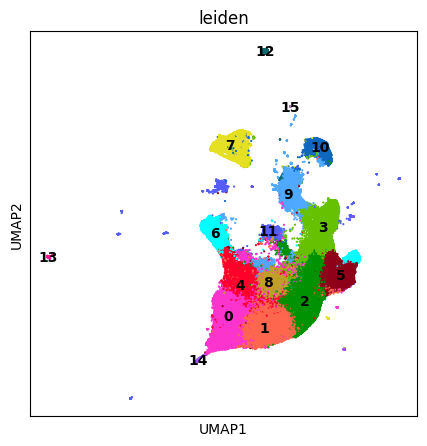

In [42]:
sc.tl.umap(
    adata, 
    min_dist=0.01,       # 减小使点更密集
    spread=2,          # 增大以扩展簇间距
    random_state=42      # 固定随机种子
)
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

In [43]:
sc.tl.umap(adata)

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


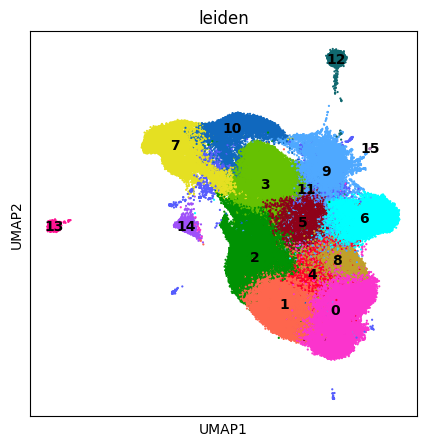

In [44]:
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


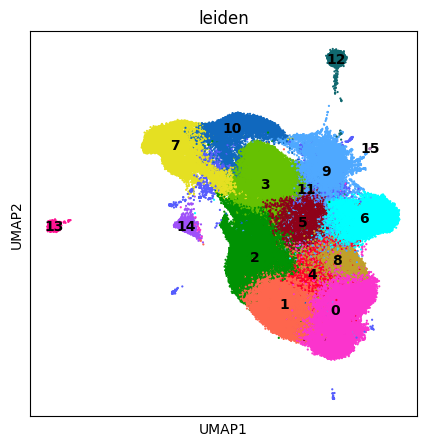

In [35]:
#res=0.5
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


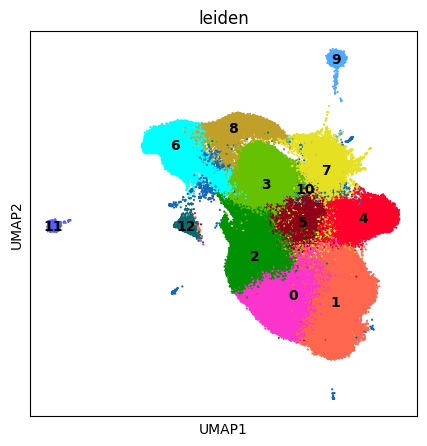

In [47]:
#res=0.4
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


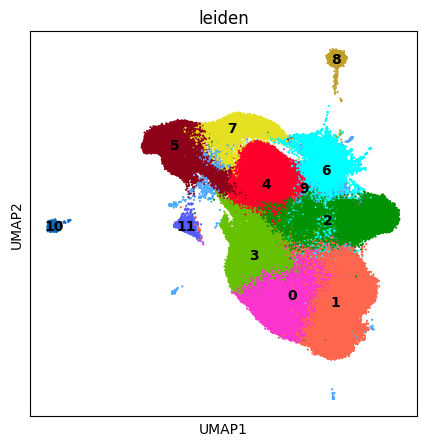

In [55]:
#res=0.35
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


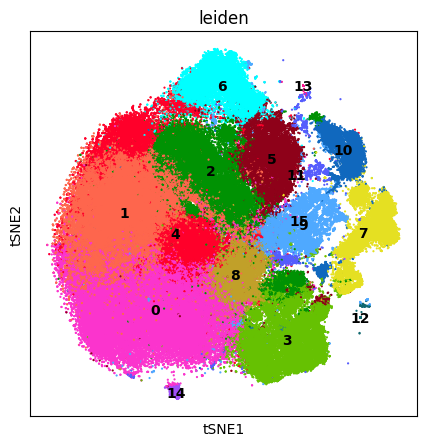

In [45]:
sc.tl.tsne(adata)

with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.tsne(adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

In [62]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [63]:
rank_genes_df = sc.get.rank_genes_groups_df(adata, group=None)

In [64]:
# 提取每个群体前10个基因
top_genes = []
groups = adata.obs['leiden'].cat.categories

for group in groups:
    top_genes.append(
        sc.get.rank_genes_groups_df(adata, group).head(5)
    )

# 将结果合并成一个DataFrame
top_genes_df = pd.concat(top_genes)
gene_names = top_genes_df['names'].unique()

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\tools\_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\tools\_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


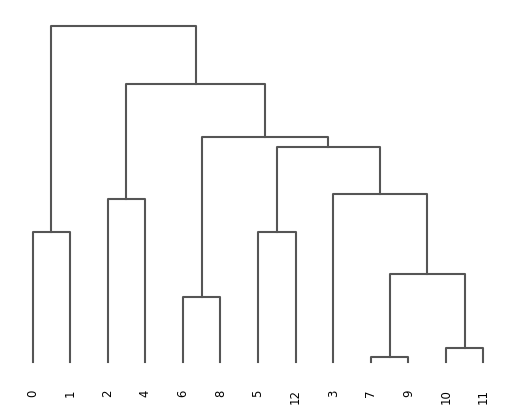

<Axes: >

In [65]:
sc.tl.dendrogram(adata, groupby="leiden")
sc.pl.dendrogram(adata, "leiden")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


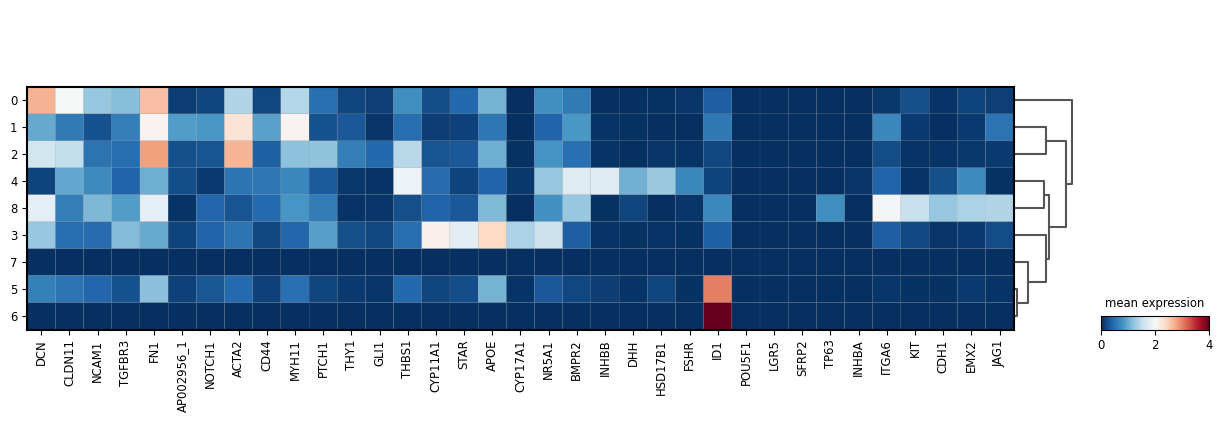

In [31]:
sc.pl.matrixplot(
    adata,
    gene_names,
    "leiden",
    colorbar_title="mean expression",
    dendrogram=True,
    vmin=0,
    vmax=4,
    cmap="RdBu_r",
    save='heatmap_all_roi_new_selected_expression_0.3.png'
)

In [17]:
adata.layers["scaled"] = sc.pp.scale(adata, copy=True).X

D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


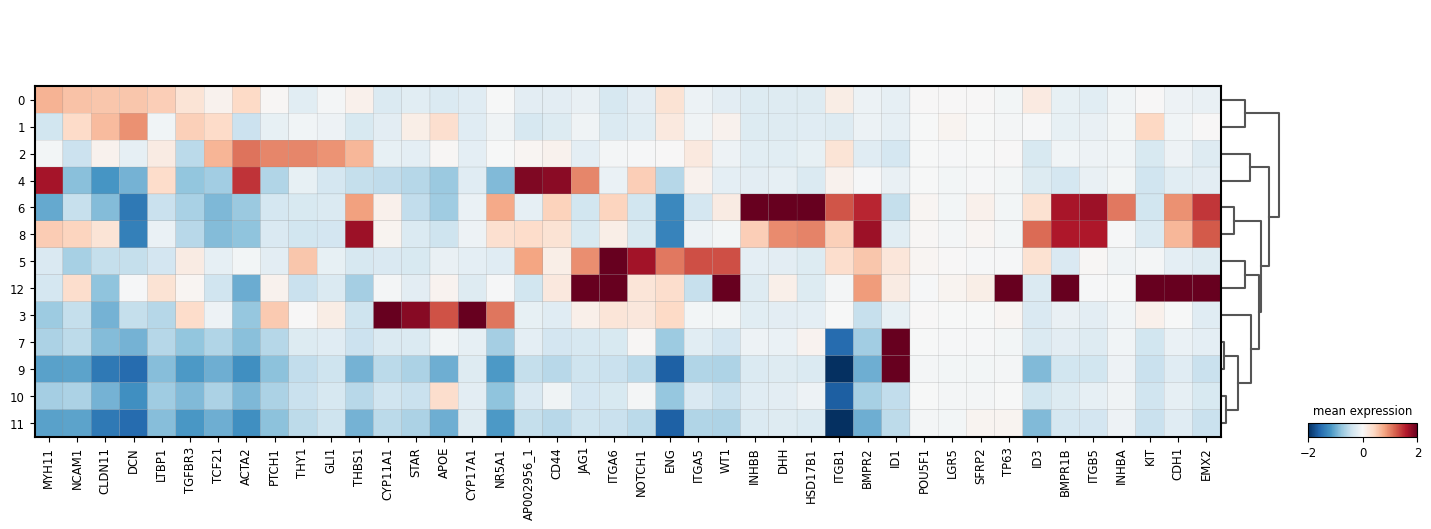

In [66]:
sc.pl.matrixplot(
    adata,
    gene_names,
    "leiden",
    colorbar_title="mean expression",
    dendrogram=True,
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    #save='heatmap_all_roi_new_selected_zscore_res0.3.png'
)

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


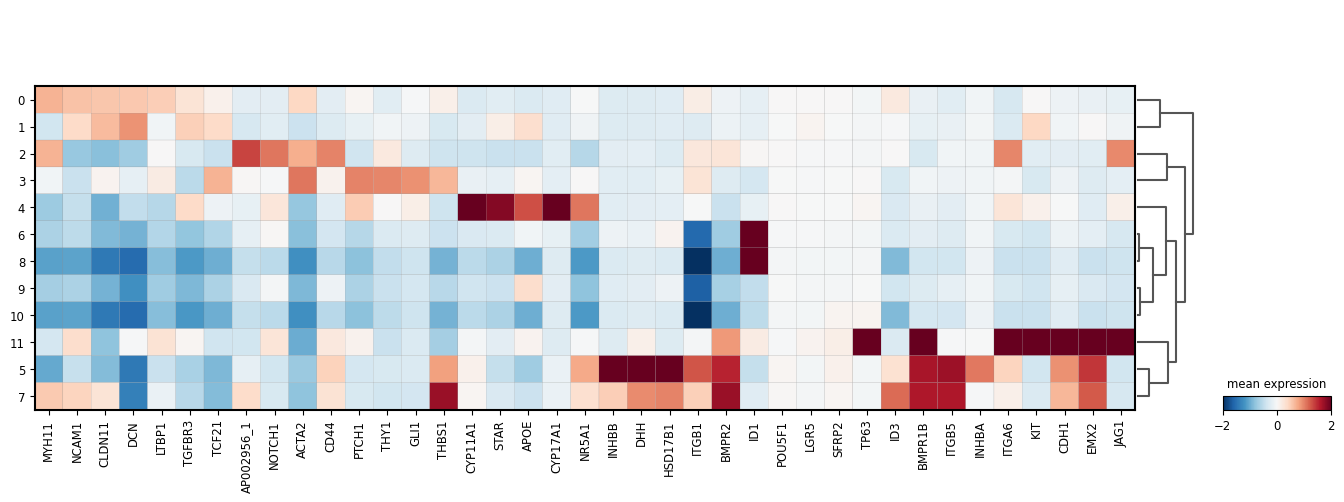

In [60]:
sc.pl.matrixplot(
    adata,
    gene_names,
    "leiden",
    colorbar_title="mean expression",
    dendrogram=True,
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    #save='heatmap_all_roi_new_selected_zscore_res0.3.png'
)

In [19]:
adata.write("combined_data_all_roi_new_selected_processed_res1.h5ad", compression="gzip")

# 4 mapping

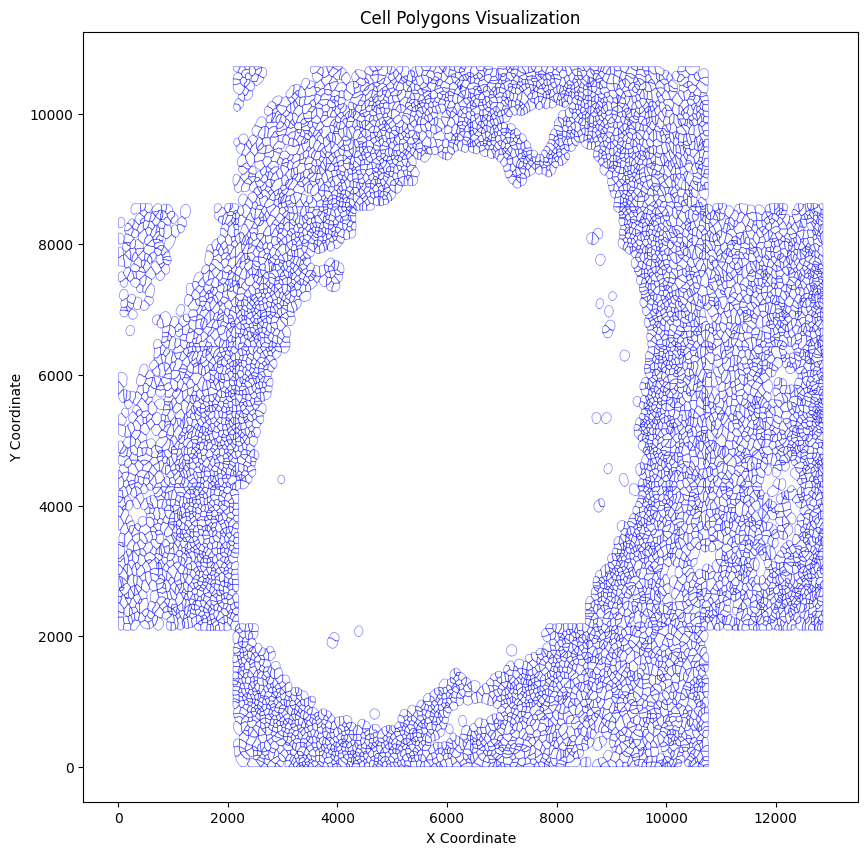

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 正确读取数据（假设数据格式为：每个细胞占多行，每行包含一个顶点坐标）
df = pd.read_csv("33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 2. 按细胞ID分组获取所有顶点
cell_groups = df.groupby("cell_id")

plt.figure(figsize=(10, 10))

# 3. 遍历每个细胞绘制多边形
for cell_id, group in cell_groups:
    try:
        # 提取该细胞的所有坐标点
        coords = list(zip(group["x"], group["y"]))
        
        # 闭合多边形（首尾相连）
        coords.append(coords[0])
        
        # 转换为x/y坐标序列
        x, y = zip(*coords)
        
        # 绘制多边形
        plt.plot(x, y, lw=0.5, color='blue', alpha=0.5)
        
    except Exception as e:
        print(f"Error plotting cell {cell_id}: {str(e)}")

# 4. 添加标签和标题
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Cell Polygons Visualization")
plt.show()

In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
# 读取原始数据
df = pd.read_csv("33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 按 cell_id 分组创建多边形
geometries = []
cell_ids = []

for cell_id, group in df.groupby("cell_id"):
    coords = list(zip(group["x"], group["y"]))
    polygon = Polygon(coords)  # Shapely 自动闭合多边形
    geometries.append(polygon)
    cell_ids.append(cell_id)

# 创建 GeoDataFrame
xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})

In [25]:
df1 = pd.read_csv("33422-2363-adult1_A1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

In [27]:
import pandas as pd

def get_range(df, name):
    return df[['x', 'y']].agg(['min', 'max']).assign(dataset=name)

# 合并结果
pd.concat([
    get_range(df, 'df'),
    get_range(df1, 'df1')
]).set_index('dataset', append=True).unstack()

x             y      
dataset     df    df1     df   df1
max      12863  10719  10719  4287
min          0      0      0     0

In [28]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
# 读取原始数据
df = pd.read_csv("33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 按 cell_id 分组创建多边形
geometries = []
cell_ids = []

for cell_id, group in df.groupby("cell_id"):
    coords = list(zip(group["x"], group["y"]))
    polygon = Polygon(coords)  # Shapely 自动闭合多边形
    geometries.append(polygon)
    cell_ids.append(cell_id)

# 创建 GeoDataFrame
xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})

In [30]:
adata.obs

full_id cell_type cell_number  \
Cell1_128_25                    Cell1_128_25      Cell           1   
Cell2_177_25                    Cell2_177_25      Cell           2   
Cell3_216_10                    Cell3_216_10      Cell           3   
Cell4_304_11                    Cell4_304_11      Cell           4   
Cell5_599_17                    Cell5_599_17      Cell           5   
...                                      ...       ...         ...   
Cell25800_9058_17117    Cell25800_9058_17117      Cell       25800   
Cell25801_12181_17129  Cell25801_12181_17129      Cell       25801   
Cell25802_9439_17120    Cell25802_9439_17120      Cell       25802   
Cell25803_12760_17134  Cell25803_12760_17134      Cell       25803   
Cell25804_5624_17105    Cell25804_5624_17105      Cell       25804   

                      coordinate_x expression sample_id sample leiden  
Cell1_128_25                   128         25      A1_1   A1_1      0  
Cell2_177_25                   177         25      A1_1   A1_1      0  
Cell3_216_10                   216         10      A1_1   A1_1      0  
Cell4_304_11                   304         11      A1_1   A1_1      0  
Cell5_599_17                   599         17      A1_1   A1_1      0  
...                            ...        ...       ...    ...    ...  
Cell25800_9058_17117          9058      17117      D2_2   D2_2      8  
Cell25801_12181_17129        12181      17129      D2_2   D2_2      8  
Cell25802_9439_17120          9439      17120      D2_2   D2_2      8  
Cell25803_12760_17134        12760      17134      D2_2   D2_2      8  
Cell25804_5624_17105          5624      17105      D2_2   D2_2      8  

[297389 rows x 8 columns]

In [37]:
adata.obs['cell_id']=adata.obs['full_id']

In [38]:
D2_1 = adata[adata.obs['sample_id'] == 'D2_1', :].copy()

In [39]:
# 确保 cell_id 类型一致（例如统一为字符串）
xenium_cell_ids = set(xenium_cell_polygons["cell_id"].astype(str))
adata_cell_ids = set(adata.obs["cell_id"].astype(str))

# 计算共有 cell_id
common_cell_ids = xenium_cell_ids & adata_cell_ids
print(f"共有 {len(common_cell_ids)} 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中")


valid_polygons = []
valid_clusters = []

# 遍历 xenium_cell_polygons 中的每个细胞
for idx, row in xenium_cell_polygons.iterrows():
    cell_id = str(row["cell_id"])  # 确保类型一致
    geom = row.geometry
    
    # 仅处理共有 cell_id 且几何有效的多边形
    if (
        cell_id in common_cell_ids
        and geom.is_valid
        and geom.geom_type == 'Polygon'
        and len(geom.exterior.coords) >= 3
    ):
        coords = list(geom.exterior.coords)
        valid_polygons.append(coords)
        # 从 adata.obs 中获取对应的聚类标签（假设 cell_id 是 adata.obs 的索引）
        valid_clusters.append(adata.obs.loc[cell_id, "leiden"])
    else:
        print(f"跳过无效或非共有 cell_id: {cell_id}")

共有 9331 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中
跳过无效或非共有 cell_id: Cell102_4929_63
跳过无效或非共有 cell_id: Cell1035_9386_899
跳过无效或非共有 cell_id: Cell1067_2462_945
跳过无效或非共有 cell_id: Cell1193_7784_1060
跳过无效或非共有 cell_id: Cell1198_7673_1057
跳过无效或非共有 cell_id: Cell1217_6825_1103
跳过无效或非共有 cell_id: Cell1249_7379_1125
跳过无效或非共有 cell_id: Cell1270_7776_1140
跳过无效或非共有 cell_id: Cell1294_8800_1187
跳过无效或非共有 cell_id: Cell1340_2749_1221
跳过无效或非共有 cell_id: Cell1363_10404_1249
跳过无效或非共有 cell_id: Cell1379_6063_1278
跳过无效或非共有 cell_id: Cell1403_2504_1284
跳过无效或非共有 cell_id: Cell1408_7419_1304
跳过无效或非共有 cell_id: Cell1414_7481_1300
跳过无效或非共有 cell_id: Cell1476_9909_1385
跳过无效或非共有 cell_id: Cell1527_6184_1466
跳过无效或非共有 cell_id: Cell161_4309_109
跳过无效或非共有 cell_id: Cell1658_2329_1687
跳过无效或非共有 cell_id: Cell1660_10324_1689
跳过无效或非共有 cell_id: Cell1686_10044_1742
跳过无效或非共有 cell_id: Cell1690_8502_1709
跳过无效或非共有 cell_id: Cell1721_8371_1782
跳过无效或非共有 cell_id: Cell1789_8393_1931
跳过无效或非共有 cell_id: Cell1817_9036_1998
跳过无效或非共有 cell_id: Ce

In [41]:
## The hexcodes for the colors used .
## The celltypes are mapped to the colors for plotting convenience.
celltypes, hex_codes = np.array(
    sorted(
        [
            ["0", "#FF6F61"],   # Coral
            ["1", "#355C7D"],   # Steel Blue
            ["2", "#6B5B95"],   # Purple
            ["3", "#FEEC37"],   # Yellow
            ["4", "#92A8D1"],   # Light Blue
            ["5", "#A2F852"],   # Lime Green
            ["6", "#00FFFF"],   # Cyan
            ["7", "#E6BEFF"],   # Light Purple
            ["8", "#FF002A"],   # Bright Red
            ["9", "#E71BE6"],   # Magenta
            ["10", "#565DFD"],  # Blue
            ["11", "#F7DC6F"],  # Light Yellow
            ["12", "#DD4124"],  # Tomato
            ["13", "#0000FF"],  # Pure Blue
            ["14", "#00CED1"],  # Dark Turquoise
            ["15", "#FF1493"],  # Deep Pink
            ["16", "#FFBB00"],  # Orange
            ["17", "#FFA07A"],  # Light Salmon
            ["18", "#8A2BE2"],  # Blue Violet
            ["19", "#88B04B"],  # Olive Green
            ["20", "#4682B4"],  # Steel Blue
            ["21", "#955251"],  # Rosy Brown
            ["22", "#009B77"],  # Teal
            ["23", "#FF4500"],  # Orange Red
            ["24", "#32CD32"],  # Lime Green
            ["25", "#9400D3"],  # Dark Violet
            ["26", "#FFD700"],  # Gold
            ["27", "#20B2AA"],  # Light Sea Green
            ["28", "#DAA520"],  # Goldenrod
            ["29", "#9932CC"],  # Dark Orchid
            ["30", "#333333"]   # Dark Gray
        ],
        key=lambda x: x[0]  # 按第一列（celltypes）排序
    )
).T
## used for converting list of celltypes to categorical.
ctype_to_code_map = {ctype: i for i, ctype in enumerate(celltypes)}
## used for converting list of celltypes to colors.
ctype_hex_map = dict(zip(celltypes, hex_codes))
## matplotlib colormap
ctype_cmap = hexlist_to_cmap("celltype_cmap", hex_codes)

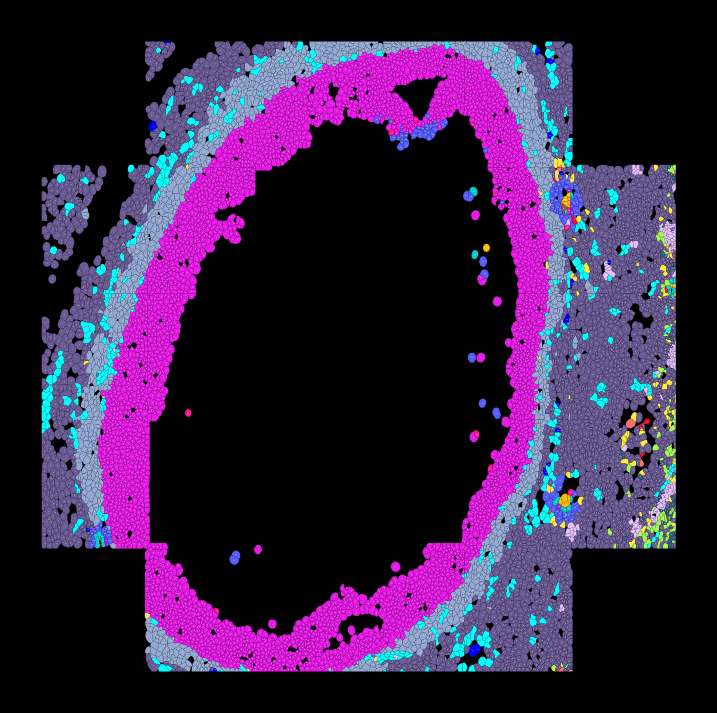

In [42]:
# 检查是否有有效数据
if len(valid_polygons) == 0:
    raise ValueError("没有可绘制的有效多边形！")

# 创建绘图
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 绘制多边形
plot_polygons(
    valid_polygons,
    ax=ax,
    array=list(map(ctype_to_code_map.get, valid_clusters)),
    edgecolor="none",
    linewidth=0,
    norm=Normalize(vmin=0, vmax=len(celltypes)),
    cmap=ctype_cmap,
)

#add text
for polygon_coords, cluster_value in zip(valid_polygons, valid_clusters):
    try:
        # 提取多边形坐标点（格式为 [(x0, y0), (x1, y1), ...]）
        x = [coord[0] for coord in polygon_coords]
        y = [coord[1] for coord in polygon_coords]
        
        # 计算中心点
        center_x = np.mean(x)
        center_y = np.mean(y)
        
        # 获取对应的 newimmune1 标签（假设 valid_clusters 已对应）
        # 如果 newimmune1 是另一个列，需通过 cell_id 匹配
        label = str(cluster_value)  # 或用 adata.obs.loc[cell_id, "newimmune1"]
        
        # 添加文本（调整字体大小和颜色以可见）
        ax.text(
            center_x, center_y, label,
            fontsize=0.01,  # 调整为合适大小（原0.001不可见）
            ha='center', va='center',
            color='white'  # 黑色背景上需用浅色
        )
    except Exception as e:
        print(f"添加标签失败: {str(e)}")

# 设置坐标轴
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('D1_1_new.png', dpi=900, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
#for single sample

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
# 读取原始数据
df = pd.read_csv("result download from website/segment/33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 按 cell_id 分组创建多边形
geometries = []
cell_ids = []

for cell_id, group in df.groupby("cell_id"):
    coords = list(zip(group["x"], group["y"]))
    polygon = Polygon(coords)  # Shapely 自动闭合多边形
    geometries.append(polygon)
    cell_ids.append(cell_id)

# 创建 GeoDataFrame
xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})


# 确保 cell_id 类型一致（例如统一为字符串）
xenium_cell_ids = set(xenium_cell_polygons["cell_id"].astype(str))
adata_cell_ids = set(adata.obs["cell_id"].astype(str))

# 计算共有 cell_id
common_cell_ids = xenium_cell_ids & adata_cell_ids
print(f"共有 {len(common_cell_ids)} 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中")


valid_polygons = []
valid_clusters = []

# 遍历 xenium_cell_polygons 中的每个细胞
for idx, row in xenium_cell_polygons.iterrows():
    cell_id = str(row["cell_id"])  # 确保类型一致
    geom = row.geometry
    
    # 仅处理共有 cell_id 且几何有效的多边形
    if (
        cell_id in common_cell_ids
        and geom.is_valid
        and geom.geom_type == 'Polygon'
        and len(geom.exterior.coords) >= 3
    ):
        coords = list(geom.exterior.coords)
        valid_polygons.append(coords)
        # 从 adata.obs 中获取对应的聚类标签（假设 cell_id 是 adata.obs 的索引）
        valid_clusters.append(adata.obs.loc[cell_id, "leiden"])
    else:
        print(f"跳过无效或非共有 cell_id: {cell_id}")


# 检查是否有有效数据
if len(valid_polygons) == 0:
    raise ValueError("没有可绘制的有效多边形！")

# 创建绘图
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 绘制多边形
plot_polygons(
    valid_polygons,
    ax=ax,
    array=list(map(ctype_to_code_map.get, valid_clusters)),
    edgecolor="none",
    linewidth=0,
    norm=Normalize(vmin=0, vmax=len(celltypes)),
    cmap=ctype_cmap,
)

#add text
for polygon_coords, cluster_value in zip(valid_polygons, valid_clusters):
    try:
        # 提取多边形坐标点（格式为 [(x0, y0), (x1, y1), ...]）
        x = [coord[0] for coord in polygon_coords]
        y = [coord[1] for coord in polygon_coords]
        
        # 计算中心点
        center_x = np.mean(x)
        center_y = np.mean(y)
        
        # 获取对应的 newimmune1 标签（假设 valid_clusters 已对应）
        # 如果 newimmune1 是另一个列，需通过 cell_id 匹配
        label = str(cluster_value)  # 或用 adata.obs.loc[cell_id, "newimmune1"]
        
        # 添加文本（调整字体大小和颜色以可见）
        ax.text(
            center_x, center_y, label,
            fontsize=0.01,  # 调整为合适大小（原0.001不可见）
            ha='center', va='center',
            color='white'  # 黑色背景上需用浅色
        )
    except Exception as e:
        print(f"添加标签失败: {str(e)}")

# 设置坐标轴
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('mapping/D1_1_new.png', dpi=900, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [21]:
adata.obs["cell_id"]=adata.obs["full_id"]

In [103]:
import os
import re
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import Polygon

def process_sample(adata, csv_path, output_dir="mapping"):
    """处理单个样本的完整流程（修复版）"""
    try:
        # 从文件名提取样本ID（新正则表达式）
        filename = os.path.basename(csv_path)
        
        # 新正则表达式：匹配类似 A1-1、B2-3 等格式
        match = re.search(r'([A-Z]\d+-\d+)_DAPI', filename)
        if not match:
            raise ValueError(f"文件名格式错误: {filename}")
        sample_id = match.group(1)  # 提取括号捕获的内容，如 A1-1
        
        # 读取数据
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        
        # 创建多边形（保持原处理逻辑）
        geometries = []
        cell_ids = []
        for cell_id, group in df.groupby("cell_id"):
            coords = list(zip(group["x"], group["y"]))
            polygon = Polygon(coords)
            geometries.append(polygon)
            cell_ids.append(cell_id)
        
        xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})

        # ID匹配（保持原逻辑）
        xenium_cell_ids = set(xenium_cell_polygons["cell_id"].astype(str))
        adata_cell_ids = set(adata.obs["cell_id"].astype(str))
        common_cell_ids = xenium_cell_ids & adata_cell_ids
        print(f"共有 {len(common_cell_ids)} 个共同 cell_id")

        # 数据过滤（优化版）
        valid_mask = (
            xenium_cell_polygons["cell_id"].astype(str).isin(common_cell_ids) &
            xenium_cell_polygons.geometry.is_valid &
            (xenium_cell_polygons.geometry.type == 'Polygon') &
            (xenium_cell_polygons.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
        )
        valid_data = xenium_cell_polygons[valid_mask].merge(
            adata.obs[["leiden"]],
            how="left",
            left_on="cell_id",
            right_index=True
        )

        if valid_data.empty:
            raise ValueError("没有可绘制的有效多边形！")

        # 创建绘图（保持原可视化设置）
        fig = plt.figure(figsize=(13, 4))
        ax = plt.gca()
        fig.patch.set_facecolor('black')
        ax.set_facecolor('black')

        # 绘制多边形
        plot_polygons(
            [list(poly.exterior.coords) for poly in valid_data.geometry],
            ax=ax,
            array=valid_data["leiden"].map(ctype_to_code_map.get),
            edgecolor="none",
            linewidth=0,
            norm=Normalize(vmin=0, vmax=len(celltypes)),
            cmap=ctype_cmap,
        )

        # 添加标签（调整字体大小为4）
        for _, row in valid_data.iterrows():
            try:
                centroid = row.geometry.centroid
                ax.text(
                    centroid.x, centroid.y,
                    str(row["leiden"]),
                    fontsize=0.01,
                    ha='center', va='center',
                    color='white'
                )
            except Exception as e:
                print(f"标签添加失败: {str(e)}")

        # 保存结果
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{sample_id}_new.png")
        plt.savefig(output_path, dpi=900, bbox_inches='tight', pad_inches=0.1)
        plt.close()
        print(f"成功保存至 {output_path}")
        return True

    except Exception as e:
        print(f"处理失败: {str(e)}")
        plt.close()
        return False

# 自动获取所有匹配文件
csv_files = glob.glob("result download from website/segment/33422-2363-adult1_*_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv")

# 处理所有样本
success_count = 0
for idx, csv_file in enumerate(csv_files, 1):
    print(f"\n处理文件 {idx}/{len(csv_files)}: {os.path.basename(csv_file)}")
    if process_sample(adata, csv_file):
        success_count += 1

print(f"\n处理完成！成功生成 {success_count} 个文件，失败 {len(csv_files)-success_count} 个")


处理文件 1/1: 33422-2363-adult1_A1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv
共有 9043 个共同 cell_id
成功保存至 mapping\A1-4_new.png

处理完成！成功生成 1 个文件，失败 0 个


In [48]:
import os
import glob
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.affinity import translate

def merge_spatial_data(file_pattern, output_path="merged_polygons.gpkg"):
    """合并多个空间数据文件的多边形"""
    # 获取所有文件路径
    files = glob.glob(file_pattern)
    print(f"找到 {len(files)} 个数据文件")
    
    # 初始化变量
    all_polygons = []
    x_offset = 0  # X轴偏移量累加器
    max_x_per_file = []  # 记录每个文件的最大X值
    
    # 第一遍遍历：计算每个文件的最大X坐标
    print("\n计算坐标偏移量...")
    for f in files:
        df = pd.read_csv(f, header=None, names=["cell_id", "x", "y"])
        max_x = df["x"].max()
        max_x_per_file.append(max_x)
        print(f"文件 {os.path.basename(f)} 最大X坐标: {max_x:.1f}")

    # 第二遍遍历：应用偏移量并创建多边形
    print("\n处理文件中...")
    for idx, (f, max_x) in enumerate(zip(files, max_x_per_file)):
        df = pd.read_csv(f, header=None, names=["cell_id", "x", "y"])
        
        # 添加文件来源标记
        df["source"] = os.path.basename(f)
        
        # 创建多边形（带偏移量）
        for (cell_id, source), group in df.groupby(["cell_id", "source"]):
            coords = list(zip(group["x"] + x_offset, group["y"]))  # 应用X偏移
            polygon = Polygon(coords)
            all_polygons.append({
                "cell_id": cell_id,
                "source": source,
                "geometry": polygon
            })
        
        # 更新偏移量：当前文件最大X + 10%间距
        x_offset += max_x * 1.1
        print(f"处理完成 {idx+1}/{len(files)} 当前总偏移量: {x_offset:.1f}")

    # 创建GeoDataFrame
    gdf = gpd.GeoDataFrame(all_polygons, geometry="geometry")
    
    # 坐标系设置（根据实际情况调整）
    gdf.crs = "EPSG:4326"  # 假设为WGS84坐标系
    
    # 保存合并结果
    gdf.to_file(output_path, driver="GPKG")
    print(f"\n合并完成！保存至 {output_path}")
    print(f"总多边形数: {len(gdf)}")
    print(f"X轴范围: {gdf.total_bounds[0]:.1f} - {gdf.total_bounds[2]:.1f}")
    print(f"Y轴范围: {gdf.total_bounds[1]:.1f} - {gdf.total_bounds[3]:.1f}")
    
    return gdf

# 使用示例
merged_gdf = merge_spatial_data(
    file_pattern="result download from website/segment/*_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv",
    output_path="merged_cell_polygons.gpkg"
)

找到 21 个数据文件

计算坐标偏移量...
文件 33422-2363-adult1_A1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_A1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_A1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 12863.0
文件 33422-2363-adult1_A2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 12863.0
文件 33422-2363-adult1_A2-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 21439.0
文件 33422-2363-adult1_A2-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_A2-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 6431.0
文件 33422-2363-adult1_B1-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_B1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_B1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_B2-1_DAPI__7.5_mu_dilated_seg

In [49]:
import matplotlib.pyplot as plt

def plot_merged_layout(gdf):
    """可视化合并后的空间布局"""
    fig, ax = plt.subplots(figsize=(25, 8))
    
    # 按来源文件着色
    sources = gdf["source"].unique()
    colors = plt.cm.tab20.colors
    
    for idx, source in enumerate(sources):
        color = colors[idx % len(colors)]
        gdf[gdf["source"] == source].plot(
            ax=ax,
            color=color,
            edgecolor='black',
            linewidth=0.3,
            alpha=0.6,
            label=source
        )
    
    # 添加图例
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=8
    )
    
    plt.title("Merged Spatial Layout")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("merged_layout.jpg", dpi=300)
    plt.show()

# 执行可视化
plot_merged_layout(merged_gdf)

ValueError: aspect must be finite and positive 

找到 21 个数据文件

计算坐标偏移量...
文件 33422-2363-adult1_A1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_A1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_A1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 12863.0
文件 33422-2363-adult1_A2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 12863.0
文件 33422-2363-adult1_A2-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 21439.0
文件 33422-2363-adult1_A2-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_A2-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 6431.0
文件 33422-2363-adult1_B1-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_B1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 8575.0
文件 33422-2363-adult1_B1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv 最大X坐标: 10719.0
文件 33422-2363-adult1_B2-1_DAPI__7.5_mu_dilated_seg

C:\Users\fwei\AppData\Local\Temp\ipykernel_25964\3240403419.py:71: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\fwei\AppData\Local\Temp\ipykernel_25964\3240403419.py:82: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  plt.tight_layout()
C:\Users\fwei\AppData\Local\Temp\ipykernel_25964\3240403419.py:82: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.tight_layout()
C:\Users\fwei\AppData\Local\Temp\ipykernel_25964\3240403419.py:82: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
C:\Users\fwei\AppData\Local\Temp\ipykernel_25964\324040

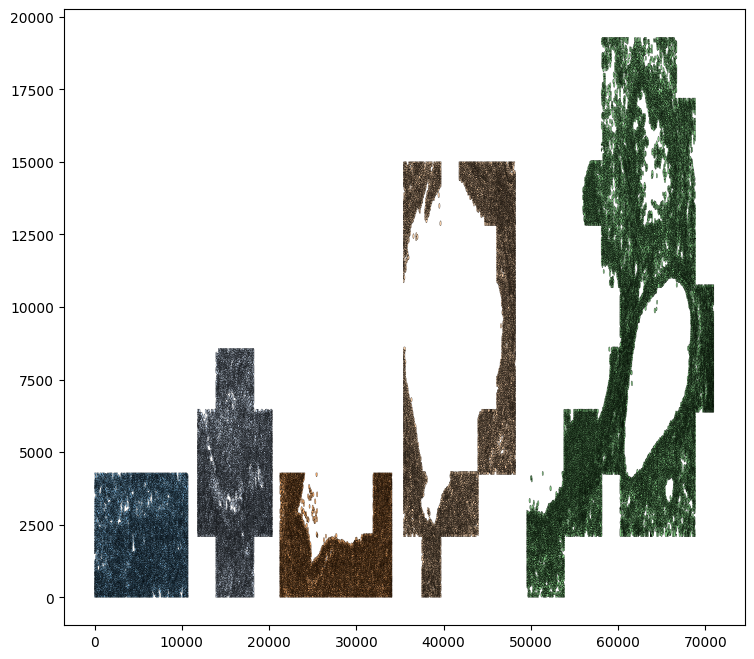

D:\anaconda\envs\xenium-publication-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\xenium-publication-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\xenium-publication-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\xenium-publication-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24182 (\N{CJK UNIFIED IDEOGRAPH-5E76}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\xenium-publication-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31354 (\N{CJK UNIFIED I

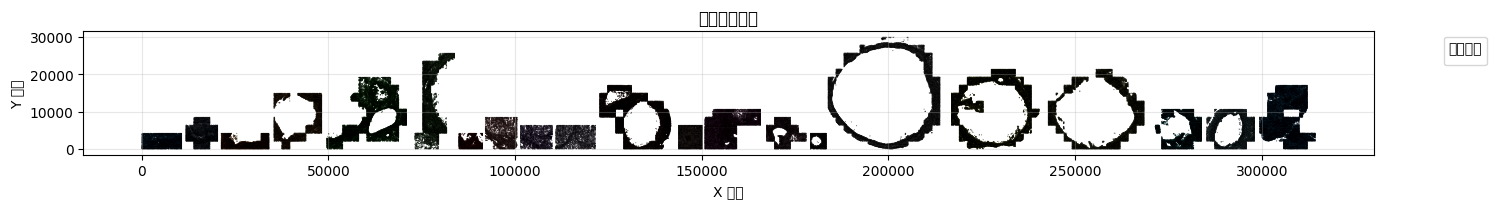

In [50]:
import os
import glob
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

def merge_spatial_data(file_pattern, output_path="merged_polygons.gpkg"):
    """合并多个空间数据文件的多边形（修复坐标系问题）"""
    files = glob.glob(file_pattern)
    print(f"找到 {len(files)} 个数据文件")
    
    all_polygons = []
    x_offset = 0
    max_x_per_file = []

    # 第一遍遍历：计算偏移量
    print("\n计算坐标偏移量...")
    for f in files:
        df = pd.read_csv(f, header=None, names=["cell_id", "x", "y"])
        max_x = df["x"].max()
        max_x_per_file.append(max_x)
        print(f"文件 {os.path.basename(f)} 最大X坐标: {max_x:.1f}")

    # 第二遍遍历：应用偏移量
    print("\n处理文件中...")
    for idx, (f, max_x) in enumerate(zip(files, max_x_per_file)):
        df = pd.read_csv(f, header=None, names=["cell_id", "x", "y"])
        df["source"] = os.path.basename(f)

        for (cell_id, source), group in df.groupby(["cell_id", "source"]):
            coords = list(zip(group["x"] + x_offset, group["y"]))
            polygon = Polygon(coords)
            all_polygons.append({
                "cell_id": cell_id,
                "source": source,
                "geometry": polygon
            })

        x_offset += max_x * 1.1
        print(f"处理完成 {idx+1}/{len(files)} 当前总偏移量: {x_offset:.1f}")

    # 创建GeoDataFrame（修复关键点：不设置地理坐标系）
    gdf = gpd.GeoDataFrame(all_polygons, geometry="geometry")
    gdf.crs = None  # 明确设置为非地理坐标系
    
    gdf.to_file(output_path, driver="GPKG")
    print(f"\n合并完成！保存至 {output_path}")
    return gdf

def plot_merged_layout(gdf):
    """可视化合并布局（修复aspect错误）"""
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 分样本绘制
    sources = gdf["source"].unique()
    colors = plt.cm.tab20.colors
    
    for idx, source in enumerate(sources):
        color = colors[idx % len(colors)]
        gdf[gdf["source"] == source].plot(
            ax=ax,
            color=color,
            edgecolor='black',
            linewidth=0.3,
            alpha=0.6,
            label=source,
            aspect='equal'  # 修复关键点：设置固定纵横比
        )
    
    # 优化图例
    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=8,
        title='样本来源'
    )
    
    plt.title("合并空间布局")
    plt.xlabel("X 坐标")
    plt.ylabel("Y 坐标")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig("merged_layout.jpg", dpi=300)
    plt.show()

# 执行合并和可视化
merged_gdf = merge_spatial_data(
    file_pattern="result download from website/segment/*_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
)
plot_merged_layout(merged_gdf)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_merged_clusters(merged_gdf, adata, output_path="merged_clusters.png"):
    """在合并后的空间布局上映射聚类结果"""
    # 数据预处理
    merged_gdf = merged_gdf.copy()
    
    # 合并聚类信息
    merged_data = merged_gdf.merge(
        adata.obs[["leiden"]],
        how="left",
        left_on="cell_id",
        right_index=True
    )

    # 过滤无效数据
    valid_mask = (
        merged_data.geometry.is_valid &
        (merged_data.geometry.type == 'Polygon') &
        (merged_data["leiden"].notna())
    )
    filtered_data = merged_data[valid_mask]
    
    if filtered_data.empty:
        raise ValueError("没有有效的聚类数据可绘制")

    # 创建绘图
    fig = plt.figure(figsize=(16, 12))
    ax = plt.gca()
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    # 绘制所有多边形
    plot_polygons(
        [list(poly.exterior.coords) for poly in filtered_data.geometry],
        ax=ax,
        array=filtered_data["leiden"].map(ctype_to_code_map.get),
        edgecolor="none",
        linewidth=0,
        norm=Normalize(vmin=0, vmax=len(celltypes)),
        cmap=ctype_cmap,
    )

    # 添加样本来源标注
    sample_positions = calculate_sample_positions(merged_gdf)
    for sample_id, (x, y) in sample_positions.items():
        ax.text(
            x, y, sample_id,
            fontsize=8, color='white',
            ha='center', va='center',
            bbox=dict(facecolor='black', alpha=0.5, edgecolor='white')
        )

    # 保存结果
    plt.savefig(output_path, dpi=600, bbox_inches='tight')
    plt.close()
    print(f"合并聚类图已保存至 {output_path}")

def calculate_sample_positions(merged_gdf):
    """计算每个样本的标注位置（左上角区域）"""
    positions = {}
    bounds = merged_gdf.total_bounds
    padding = (bounds[2] - bounds[0]) * 0.05  # 5%边距
    
    # 按source分组计算位置
    for idx, (source, group) in enumerate(merged_gdf.groupby("source")):
        x = bounds[0] + padding
        y = bounds[3] - padding * (idx + 1)
        positions[source] = (x, y)
    return positions

# 使用示例
if __name__ == "__main__":
    # 加载合并后的多边形数据
    merged_gdf = gpd.read_file("merged_cell_polygons.gpkg")
    
    # 执行绘图
    plot_merged_clusters(
        merged_gdf=merged_gdf,
        adata=adata,
        output_path="merged_spatial_clusters.png"
    )

# 6 maping of gene

In [16]:
from anndata import read_h5ad
combined_adata=read_h5ad("combined_data_all_roi_raw.h5ad")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
combined_adata

AnnData object with n_obs × n_vars = 297389 × 78
    obs: 'full_id', 'cell_type', 'cell_number', 'coordinate_x', 'expression', 'sample_id', 'sample'

In [17]:
adata=combined_adata

In [21]:
adata.obs["cell_id"]=adata.obs["full_id"]

In [10]:
import os
import re
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

def plot_fshr_single_sample(adata, csv_path, output_dir="fshr_expression"):
    """绘制单个样本FSHR表达分布（修复版）"""
    try:
        # ================== 1. 数据预处理 ==================
        # 检查基因是否存在
        target_gene = 'PARK7'
        if target_gene not in adata.var_names:
            raise ValueError(f"基因 {target_gene} 未找到")

        # ================== 2. 获取表达数据 ==================
        # 安全获取表达矩阵（处理稀疏矩阵）
        def get_expression_matrix(use_raw=True):
            if use_raw and adata.raw is not None and target_gene in adata.raw.var_names:
                matrix = adata.raw[:, target_gene].X
            else:
                matrix = adata[:, target_gene].X
            return matrix.toarray().flatten() if issparse(matrix) else matrix

        fshr_exp = pd.Series(
            get_expression_matrix(use_raw=True),
            index=adata.obs.index
        )

        # ================== 3. 空间数据处理 ==================
        # 提取样本ID
        filename = os.path.basename(csv_path)
        if (match := re.search(r'([A-Z]\d+-\d+)_DAPI', filename)) is None:
            raise ValueError(f"文件名格式错误: {filename}")
        sample_id = match.group(1)

        # 读取CSV并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        
        # 生成GeoDataFrame
        polygons = []
        for cell_id, group in df.groupby("cell_id"):
            polygons.append({
                'cell_id': str(cell_id),  # 强制转换为字符串确保类型一致
                'geometry': Polygon(list(zip(group.x, group.y)))
            })
        xenium_polygons = gpd.GeoDataFrame(polygons)

        # ================== 4. 数据合并 ==================
        # 合并表达数据与空间数据
        merged_data = xenium_polygons.merge(
            fshr_exp.rename('PARK7'),  # 使用重命名的Series
            left_on='cell_id',
            right_index=True,
            how='inner'
        )
        
        if merged_data.empty:
            raise ValueError("没有匹配的空间数据与表达数据")

        # ================== 5. 可视化 ==================
        # 创建画布
        fig, ax = plt.subplots(figsize=(9, 9), facecolor='black')
        ax.set_facecolor('black')

        # 设置颜色映射
        expr_values = merged_data['PARK7']
        vmax = max(expr_values.quantile(0.99), 1)  # 防止全0情况
        norm = Normalize(vmin=0, vmax=vmax)
        cmap = plt.get_cmap('viridis')

        # 绘制多边形（假设 plot_polygons 已定义）
        for _, row in merged_data.iterrows():
            poly = row.geometry
            color = cmap(norm(row['PARK7']))
            ax.fill(*poly.exterior.xy, color=color, linewidth=0)

        # 添加颜色条
        cbar = fig.colorbar(
            plt.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax=ax,
            pad=0.02
        )
        cbar.set_label('PARK7 Expression', rotation=270, labelpad=25, color='white')
        cbar.ax.yaxis.set_tick_params(color='white')
        plt.setp(cbar.ax.get_yticklabels(), color='white')

        # ================== 6. 保存结果 ==================
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{sample_id}_FSHR.png")
        plt.savefig(output_path, dpi=900, bbox_inches='tight', pad_inches=0.1)
        plt.close()
        
        print(f"成功保存至 {output_path}")
        return True

    except Exception as e:
        print(f"处理失败: {str(e)}")
        plt.close() if 'plt' in locals() else None
        return False

# 测试示例
if __name__ == "__main__":
    # 示例数据加载（需替换为实际数据）
    import scanpy as sc
    adata = sc.datasets.pbmc68k_reduced()
    adata.raw = adata  # 模拟原始数据
    
    # 运行测试
    test_file = "path/to/your/sample.csv"
    plot_fshr_single_sample(adata, test_file)

处理失败: Data must be 1-dimensional, got ndarray of shape (700, 1) instead


In [10]:
adata.X

<297389x78 sparse matrix of type '<class 'numpy.float32'>'
	with 7125877 stored elements in Compressed Sparse Row format>

In [16]:
if adata.raw is None:
    raise ValueError("adata.raw 未初始化！请先运行 NormalizeData 并保存原始数据。")


In [15]:
# 关键步骤：保存原始数据到 adata.raw
adata.raw = adata  # 将原始计数存入 adata.raw

# 执行标准化（仅修改 adata.X，不影响 adata.raw）
sc.pp.normalize_total(adata, target_sum=1e4)  # CPM 归一化
sc.pp.log1p(adata) 

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [22]:
print(adata.var_names[:10].tolist())

['HES4', 'TNFRSF4', 'SSU72', 'PARK7', 'RBP7', 'SRM', 'MAD2L2', 'AGTRAP', 'TNFRSF1B', 'EFHD2']


In [19]:
adata

AnnData object with n_obs × n_vars = 297389 × 78
    obs: 'full_id', 'cell_type', 'cell_number', 'coordinate_x', 'expression', 'sample_id', 'sample'

In [18]:
adata.var_names

Index(['ACTA2', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ANPEP', 'AP002956_1', 'APOD',
       'APOE', 'AR', 'BMPR1A', 'BMPR1B', 'BMPR2', 'CD44', 'CDH1', 'CDKN1B',
       'CLDN11', 'CYP11A1', 'CYP19A1', 'DCN', 'DHH', 'EMX2', 'ENG', 'ESR1',
       'ESR2', 'FN1', 'FSHR', 'FZD6', 'GLI1', 'GLI2', 'HSD11B1', 'HSD17B1',
       'HSD3B2', 'ICAM1', 'ID1', 'ID3', 'ID4', 'INHA', 'INHBA', 'INHBB',
       'ITGA5', 'ITGA6', 'ITGB1', 'ITGB5', 'JAG1', 'KIT', 'KITLG', 'LGR5',
       'LHCGR', 'LHX9', 'LTBP1', 'MMP15', 'MYH11', 'NCAM1', 'NGFR', 'NOTCH1',
       'NOTCH2', 'NOTCH3', 'NR5A1', 'NT5E', 'PECAM1', 'PGR', 'POU5F1', 'PTCH1',
       'PTCH2', 'SFRP2', 'SNAI2', 'STAR', 'TCF21', 'TGFBR1', 'TGFBR3', 'THBD',
       'THBS1', 'THY1', 'TOX3', 'TP63', 'VCAM1', 'WNT6', 'WT1'],
      dtype='object', name='gene')

In [8]:
adata.obs

full_id cell_type cell_number  \
Cell1_128_25                    Cell1_128_25      Cell           1   
Cell2_177_25                    Cell2_177_25      Cell           2   
Cell3_216_10                    Cell3_216_10      Cell           3   
Cell4_304_11                    Cell4_304_11      Cell           4   
Cell5_599_17                    Cell5_599_17      Cell           5   
...                                      ...       ...         ...   
Cell25800_9058_17117    Cell25800_9058_17117      Cell       25800   
Cell25801_12181_17129  Cell25801_12181_17129      Cell       25801   
Cell25802_9439_17120    Cell25802_9439_17120      Cell       25802   
Cell25803_12760_17134  Cell25803_12760_17134      Cell       25803   
Cell25804_5624_17105    Cell25804_5624_17105      Cell       25804   

                      coordinate_x expression sample_id sample  
Cell1_128_25                   128         25      A1_1   A1_1  
Cell2_177_25                   177         25      A1_1   A1_1  
Cell3_216_10                   216         10      A1_1   A1_1  
Cell4_304_11                   304         11      A1_1   A1_1  
Cell5_599_17                   599         17      A1_1   A1_1  
...                            ...        ...       ...    ...  
Cell25800_9058_17117          9058      17117      D2_2   D2_2  
Cell25801_12181_17129        12181      17129      D2_2   D2_2  
Cell25802_9439_17120          9439      17120      D2_2   D2_2  
Cell25803_12760_17134        12760      17134      D2_2   D2_2  
Cell25804_5624_17105          5624      17105      D2_2   D2_2  

[297389 rows x 7 columns]

In [ ]:
#for single sample

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
# 读取原始数据
df = pd.read_csv("result download from website/segment/33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 按 cell_id 分组创建多边形
geometries = []
cell_ids = []

for cell_id, group in df.groupby("cell_id"):
    coords = list(zip(group["x"], group["y"]))
    polygon = Polygon(coords)  # Shapely 自动闭合多边形
    geometries.append(polygon)
    cell_ids.append(cell_id)

# 创建 GeoDataFrame
xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})


# 确保 cell_id 类型一致（例如统一为字符串）
xenium_cell_ids = set(xenium_cell_polygons["cell_id"].astype(str))
adata_cell_ids = set(adata.obs["cell_id"].astype(str))

# 计算共有 cell_id
common_cell_ids = xenium_cell_ids & adata_cell_ids
print(f"共有 {len(common_cell_ids)} 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中")


valid_polygons = []
valid_clusters = []

# 遍历 xenium_cell_polygons 中的每个细胞
for idx, row in xenium_cell_polygons.iterrows():
    cell_id = str(row["cell_id"])  # 确保类型一致
    geom = row.geometry
    
    # 仅处理共有 cell_id 且几何有效的多边形
    if (
        cell_id in common_cell_ids
        and geom.is_valid
        and geom.geom_type == 'Polygon'
        and len(geom.exterior.coords) >= 3
    ):
        coords = list(geom.exterior.coords)
        valid_polygons.append(coords)
        # 从 adata.obs 中获取对应的聚类标签（假设 cell_id 是 adata.obs 的索引）
        valid_clusters.append(adata.obs.loc[cell_id, "leiden"])
    else:
        print(f"跳过无效或非共有 cell_id: {cell_id}")


# 检查是否有有效数据
if len(valid_polygons) == 0:
    raise ValueError("没有可绘制的有效多边形！")

# 创建绘图
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 绘制多边形
plot_polygons(
    valid_polygons,
    ax=ax,
    array=list(map(ctype_to_code_map.get, valid_clusters)),
    edgecolor="none",
    linewidth=0,
    norm=Normalize(vmin=0, vmax=len(celltypes)),
    cmap=ctype_cmap,
)



# 设置坐标轴
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('mapping/D1_1_new.png', dpi=900, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [15]:
 adata.var_names

Index(['HES4', 'TNFRSF4', 'SSU72', 'PARK7', 'RBP7', 'SRM', 'MAD2L2', 'AGTRAP',
       'TNFRSF1B', 'EFHD2',
       ...
       'ATP5O', 'MRPS6', 'TTC3', 'U2AF1', 'CSTB', 'SUMO3', 'ITGB2', 'S100B',
       'PRMT2', 'MT-ND3'],
      dtype='object', name='index', length=765)

In [22]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 参数配置 ==================
GENE_NAME = "CYP11A1"          # 目标基因
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"  # 样本路径
OUTPUT_DIR = "single_sample_gene_expression"  # 输出目录
DPI = 900                      # 图像分辨率
CMAP = "viridis"               # 颜色映射（可选：magma, plasma, inferno）

# ================== 核心函数 ==================
def plot_single_sample_gene_expression(adata, csv_path):
    """处理单个样本的基因表达绘图"""
    try:
        # 1. 检查基因存在性
        if GENE_NAME not in adata.var_names:
            raise ValueError(f"基因 {GENE_NAME} 未找到")

        # 2. 读取空间数据并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)  # 强制转换为字符串
        
        # 生成GeoDataFrame
        polygons = []
        for cell_id, group in df.groupby("cell_id"):
            poly = Polygon(zip(group.x, group.y))
            polygons.append({'cell_id': cell_id, 'geometry': poly})
        spatial_gdf = gpd.GeoDataFrame(polygons)

        # 3. 提取该样本对应的adata细胞子集
        sample_cells = spatial_gdf['cell_id'].unique()
        adata_subset = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 4. 获取基因表达数据（处理稀疏矩阵）
        if issparse(adata_subset.X):
            gene_exp = pd.Series(
                adata_subset[:, GENE_NAME].X.toarray().flatten(),
                index=adata_subset.obs['cell_id'].astype(str)
            )
        else:
            gene_exp = pd.Series(
                adata_subset[:, GENE_NAME].X.flatten(),
                index=adata_subset.obs['cell_id'].astype(str)
            )

        # 5. 合并空间与表达数据
        merged_gdf = spatial_gdf.merge(
            gene_exp.rename('expression'),
            left_on='cell_id',
            right_index=True,
            how='inner'
        )
        
        if merged_gdf.empty:
            raise ValueError("无匹配的细胞数据")

        # 6. 过滤无效几何
        valid_gdf = merged_gdf[
            merged_gdf.geometry.is_valid & 
            (merged_gdf.geometry.type == 'Polygon') &
            (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
        ]

        # 7. 可视化设置
        fig, ax = plt.subplots(figsize=(9, 9), facecolor='black')
        ax.set_facecolor('black')
        ax.set_xticks([])
        ax.set_yticks([])

        # 动态颜色范围（基于99%分位数）
        expr_values = valid_gdf['expression']
        vmax = max(expr_values.quantile(0.99), 1e-5)  # 防止全0
        norm = Normalize(vmin=0, vmax=vmax)

        # 8. 绘制多边形
        for _, row in valid_gdf.iterrows():
            poly = row.geometry
            color = plt.get_cmap(CMAP)(norm(row['expression']))
            ax.fill(*poly.exterior.xy, color=color, linewidth=0)

        # 9. 添加颜色条
        cbar = fig.colorbar(
            plt.cm.ScalarMappable(norm=norm, cmap=CMAP),
            ax=ax,
            pad=0.02
        )
        cbar.set_label(f'{GENE_NAME} Expression', rotation=270, labelpad=25, color='white')
        cbar.ax.tick_params(color='white', labelcolor='white')

        # 10. 保存结果
        os.makedirs(OUTPUT_DIR, exist_ok=True)
        sample_id = re.search(r'([A-Z]\d+-\d+)_DAPI', os.path.basename(csv_path)).group(1)
        output_path = os.path.join(OUTPUT_DIR, f"{sample_id}_{GENE_NAME}.png")
        plt.savefig(output_path, dpi=DPI, bbox_inches='tight', pad_inches=0.1)
        plt.close()
        print(f"成功保存至: {output_path}")
        return True

    except Exception as e:
        print(f"处理失败: {str(e)}")
        plt.close() if 'plt' in locals() else None
        return False

# ================== 执行代码 ==================
if __name__ == "__main__":
    # 假设 adata 已加载并包含 cell_id 列
    plot_single_sample_gene_expression(adata, SAMPLE_CSV_PATH)

成功保存至: single_sample_gene_expression\D2-1_CYP11A1.png


In [24]:
# 定义目标基因列表
target_genes = [
    "NR5A1", "STAR", "CYP11A1", "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]

# 检查缺失基因
missing_genes = sorted(set(target_genes) - set(adata.var_names))
existing_genes = sorted(set(target_genes) & set(adata.var_names))

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"可绘制的基因 ({len(existing_genes)}):\n{existing_genes}")

未找到的基因 (0):
[]

可绘制的基因 (34):
['ACVR1B', 'ACVR2A', 'ACVR2B', 'BMPR1B', 'BMPR2', 'CYP11A1', 'CYP19A1', 'DHH', 'ESR1', 'ESR2', 'FSHR', 'FZD6', 'GLI1', 'GLI2', 'HSD11B1', 'HSD17B1', 'ID1', 'ID3', 'ID4', 'INHA', 'INHBB', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NR5A1', 'PGR', 'PTCH1', 'PTCH2', 'SFRP2', 'STAR', 'TGFBR1', 'TGFBR3', 'WNT6']


In [ ]:
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1",  "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]

In [29]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1",  "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_B2-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "Gene_Expression_No_Legend"  # 输出目录
ASPECT_RATIO = (19, 17)  # 图像比例 (宽度, 高度)
DPI = 900               # 分辨率
CMAP = "plasma"        # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数 ==================
def plot_genes_without_legend(adata, csv_path, genes):
    """绘制多个基因的无图例空间表达图"""
    try:
        # 1. 读取空间数据并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)  # 统一为字符串类型
        
        # 生成多边形数据
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图
        for gene in genes:
            # 提取基因表达数据
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            
            # 过滤无效几何
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]
            
            # 动态颜色范围
            expr_values = valid_gdf['expression']
            vmax = max(expr_values.quantile(0.99), 1e-5)  # 下限保底
            norm = Normalize(vmin=0, vmax=vmax)

            # 创建画布
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_without_legend(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (34):
['NR5A1', 'STAR', 'CYP11A1', 'CYP19A1', 'HSD17B1', 'HSD11B1', 'ESR1', 'ESR2', 'PGR', 'FSHR', 'INHA', 'INHBB', 'BMPR1B', 'BMPR2', 'TGFBR1', 'TGFBR3', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ID1', 'ID3', 'ID4', 'DHH', 'PTCH1', 'PTCH2', 'GLI1', 'GLI2', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'WNT6', 'FZD6', 'SFRP2']

生成: NR5A1_expression.png
生成: STAR_expression.png
生成: CYP11A1_expression.png
生成: CYP19A1_expression.png
生成: HSD17B1_expression.png
生成: HSD11B1_expression.png
生成: ESR1_expression.png
生成: ESR2_expression.png
生成: PGR_expression.png
生成: FSHR_expression.png
生成: INHA_expression.png
生成: INHBB_expression.png
生成: BMPR1B_expression.png
生成: BMPR2_expression.png
生成: TGFBR1_expression.png
生成: TGFBR3_expression.png
生成: ACVR1B_expression.png
生成: ACVR2A_expression.png
生成: ACVR2B_expression.png
生成: ID1_expression.png
生成: ID3_expression.png
生成: ID4_expression.png
生成: DHH_expression.png
生成: PTCH1_expression.png
生成: PTCH2_expression.png
生成: GLI1_expression.png
生成: GLI2_expressi

In [106]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1",  "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_B2-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "B2_4"  # 输出目录
ASPECT_RATIO = (19, 17)  # 图像比例 (宽度, 高度)
DPI = 900               # 分辨率
CMAP = "plasma"        # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数 ==================
def plot_genes_without_legend(adata, csv_path, genes):
    """绘制多个基因的无图例空间表达图"""
    try:
        # 1. 读取空间数据并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)  # 统一为字符串类型
        
        # 生成多边形数据
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图
        for gene in genes:
            # 提取基因表达数据
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            
            # 过滤无效几何
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]
            
            # 动态颜色范围
            expr_values = valid_gdf['expression']
            vmax = max(expr_values.quantile(0.99), 1e-5)  # 下限保底
            norm = Normalize(vmin=0, vmax=vmax)

            # 创建画布
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_without_legend(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (34):
['NR5A1', 'STAR', 'CYP11A1', 'CYP19A1', 'HSD17B1', 'HSD11B1', 'ESR1', 'ESR2', 'PGR', 'FSHR', 'INHA', 'INHBB', 'BMPR1B', 'BMPR2', 'TGFBR1', 'TGFBR3', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ID1', 'ID3', 'ID4', 'DHH', 'PTCH1', 'PTCH2', 'GLI1', 'GLI2', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'WNT6', 'FZD6', 'SFRP2']



KeyboardInterrupt: 

In [107]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1",  "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C1_1"  # 输出目录
ASPECT_RATIO = (10.7, 8.5)  # 图像比例 (宽度, 高度)
DPI = 900               # 分辨率
CMAP = "plasma"        # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数 ==================
def plot_genes_without_legend(adata, csv_path, genes):
    """绘制多个基因的无图例空间表达图"""
    try:
        # 1. 读取空间数据并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)  # 统一为字符串类型
        
        # 生成多边形数据
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图
        for gene in genes:
            # 提取基因表达数据
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            
            # 过滤无效几何
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]
            
            # 动态颜色范围
            expr_values = valid_gdf['expression']
            vmax = max(expr_values.quantile(0.99), 1e-5)  # 下限保底
            norm = Normalize(vmin=0, vmax=vmax)

            # 创建画布
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_without_legend(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (34):
['NR5A1', 'STAR', 'CYP11A1', 'CYP19A1', 'HSD17B1', 'HSD11B1', 'ESR1', 'ESR2', 'PGR', 'FSHR', 'INHA', 'INHBB', 'BMPR1B', 'BMPR2', 'TGFBR1', 'TGFBR3', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ID1', 'ID3', 'ID4', 'DHH', 'PTCH1', 'PTCH2', 'GLI1', 'GLI2', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'WNT6', 'FZD6', 'SFRP2']

生成: NR5A1_expression.png
生成: STAR_expression.png
生成: CYP11A1_expression.png
生成: CYP19A1_expression.png
生成: HSD17B1_expression.png
生成: HSD11B1_expression.png
生成: ESR1_expression.png
生成: ESR2_expression.png
生成: PGR_expression.png
生成: FSHR_expression.png
生成: INHA_expression.png
生成: INHBB_expression.png
生成: BMPR1B_expression.png
生成: BMPR2_expression.png
生成: TGFBR1_expression.png
生成: TGFBR3_expression.png
生成: ACVR1B_expression.png
生成: ACVR2A_expression.png
生成: ACVR2B_expression.png
生成: ID1_expression.png
生成: ID3_expression.png
生成: ID4_expression.png
生成: DHH_expression.png
生成: PTCH1_expression.png
生成: PTCH2_expression.png
生成: GLI1_expression.png
生成: GLI2_expressi

In [108]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1",  "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C2-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C2_2"  # 输出目录
ASPECT_RATIO = (20, 20)  # 图像比例 (宽度, 高度)
DPI = 900               # 分辨率
CMAP = "plasma"        # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数 ==================
def plot_genes_without_legend(adata, csv_path, genes):
    """绘制多个基因的无图例空间表达图"""
    try:
        # 1. 读取空间数据并生成多边形
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)  # 统一为字符串类型
        
        # 生成多边形数据
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图
        for gene in genes:
            # 提取基因表达数据
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            
            # 过滤无效几何
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]
            
            # 动态颜色范围
            expr_values = valid_gdf['expression']
            vmax = max(expr_values.quantile(0.99), 1e-5)  # 下限保底
            norm = Normalize(vmin=0, vmax=vmax)

            # 创建画布
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_without_legend(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (34):
['NR5A1', 'STAR', 'CYP11A1', 'CYP19A1', 'HSD17B1', 'HSD11B1', 'ESR1', 'ESR2', 'PGR', 'FSHR', 'INHA', 'INHBB', 'BMPR1B', 'BMPR2', 'TGFBR1', 'TGFBR3', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ID1', 'ID3', 'ID4', 'DHH', 'PTCH1', 'PTCH2', 'GLI1', 'GLI2', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'WNT6', 'FZD6', 'SFRP2']

生成: NR5A1_expression.png


KeyboardInterrupt: 

In [109]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = [
    "NR5A1", "STAR", "CYP11A1", "CYP19A1", "HSD17B1", "HSD11B1",
    "ESR1", "ESR2", "PGR", "FSHR", "INHA", "INHBB", "BMPR1B", "BMPR2",
    "TGFBR1", "TGFBR3", "ACVR1B", "ACVR2A", "ACVR2B", "ID1", "ID3", "ID4",
    "DHH", "PTCH1", "PTCH2", "GLI1", "GLI2", "JAG1", "NOTCH1", "NOTCH2",
    "NOTCH3", "WNT6", "FZD6", "SFRP2"
]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C2_2"  # 输出目录（建议新目录）
ASPECT_RATIO = (10.7, 8.5)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (34):
['NR5A1', 'STAR', 'CYP11A1', 'CYP19A1', 'HSD17B1', 'HSD11B1', 'ESR1', 'ESR2', 'PGR', 'FSHR', 'INHA', 'INHBB', 'BMPR1B', 'BMPR2', 'TGFBR1', 'TGFBR3', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ID1', 'ID3', 'ID4', 'DHH', 'PTCH1', 'PTCH2', 'GLI1', 'GLI2', 'JAG1', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'WNT6', 'FZD6', 'SFRP2']

生成: NR5A1_expression.png
生成: STAR_expression.png
生成: CYP11A1_expression.png
生成: CYP19A1_expression.png
生成: HSD17B1_expression.png
生成: HSD11B1_expression.png
生成: ESR1_expression.png
生成: ESR2_expression.png
生成: PGR_expression.png
生成: FSHR_expression.png
生成: INHA_expression.png
生成: INHBB_expression.png
生成: BMPR1B_expression.png
生成: BMPR2_expression.png
生成: TGFBR1_expression.png
生成: TGFBR3_expression.png
生成: ACVR1B_expression.png
生成: ACVR2A_expression.png
生成: ACVR2B_expression.png
生成: ID1_expression.png
生成: ID3_expression.png
生成: ID4_expression.png
生成: DHH_expression.png
生成: PTCH1_expression.png
生成: PTCH2_expression.png
生成: GLI1_expression.png
生成: GLI2_expressi

In [113]:
all_genes = adata.var_names.tolist()

In [115]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = all_genes
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C2-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C2_2"  # 输出目录（建议新目录）
ASPECT_RATIO = (20,20)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (79):
['ACTA2', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ANPEP', 'AP002956_1', 'APOD', 'APOE', 'AR', 'BMPR1A', 'BMPR1B', 'BMPR2', 'CD44', 'CDH1', 'CDKN1B', 'CLDN11', 'CYP11A1', 'CYP17A1', 'CYP19A1', 'DCN', 'DHH', 'EMX2', 'ENG', 'ESR1', 'ESR2', 'FN1', 'FSHR', 'FZD6', 'GLI1', 'GLI2', 'HSD11B1', 'HSD17B1', 'HSD3B2', 'ICAM1', 'ID1', 'ID3', 'ID4', 'INHA', 'INHBA', 'INHBB', 'ITGA5', 'ITGA6', 'ITGB1', 'ITGB5', 'JAG1', 'KIT', 'KITLG', 'LGR5', 'LHCGR', 'LHX9', 'LTBP1', 'MMP15', 'MYH11', 'NCAM1', 'NGFR', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NR5A1', 'NT5E', 'PECAM1', 'PGR', 'POU5F1', 'PTCH1', 'PTCH2', 'SFRP2', 'SNAI2', 'STAR', 'TCF21', 'TGFBR1', 'TGFBR3', 'THBD', 'THBS1', 'THY1', 'TOX3', 'TP63', 'VCAM1', 'WNT6', 'WT1']

生成: ACTA2_expression.png
生成: ACVR1B_expression.png
生成: ACVR2A_expression.png
生成: ACVR2B_expression.png
生成: ANPEP_expression.png
生成: AP002956_1_expression.png
生成: APOD_expression.png
生成: APOE_expression.png
生成: AR_expression.png
生成: BMPR1A_expression.png
生成: BMPR1B_expressi

In [ ]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = all_genes
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C1_1"  # 输出目录（建议新目录）
ASPECT_RATIO = (10.7,8.6)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

In [116]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = all_genes
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_A1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "A1_4"  # 输出目录（建议新目录）
ASPECT_RATIO = (12.8,4.3)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (79):
['ACTA2', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ANPEP', 'AP002956_1', 'APOD', 'APOE', 'AR', 'BMPR1A', 'BMPR1B', 'BMPR2', 'CD44', 'CDH1', 'CDKN1B', 'CLDN11', 'CYP11A1', 'CYP17A1', 'CYP19A1', 'DCN', 'DHH', 'EMX2', 'ENG', 'ESR1', 'ESR2', 'FN1', 'FSHR', 'FZD6', 'GLI1', 'GLI2', 'HSD11B1', 'HSD17B1', 'HSD3B2', 'ICAM1', 'ID1', 'ID3', 'ID4', 'INHA', 'INHBA', 'INHBB', 'ITGA5', 'ITGA6', 'ITGB1', 'ITGB5', 'JAG1', 'KIT', 'KITLG', 'LGR5', 'LHCGR', 'LHX9', 'LTBP1', 'MMP15', 'MYH11', 'NCAM1', 'NGFR', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NR5A1', 'NT5E', 'PECAM1', 'PGR', 'POU5F1', 'PTCH1', 'PTCH2', 'SFRP2', 'SNAI2', 'STAR', 'TCF21', 'TGFBR1', 'TGFBR3', 'THBD', 'THBS1', 'THY1', 'TOX3', 'TP63', 'VCAM1', 'WNT6', 'WT1']



D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


生成: ACTA2_expression.png
生成: ACVR1B_expression.png
生成: ACVR2A_expression.png
生成: ACVR2B_expression.png
生成: ANPEP_expression.png
生成: AP002956_1_expression.png
生成: APOD_expression.png
生成: APOE_expression.png
生成: AR_expression.png
生成: BMPR1A_expression.png
生成: BMPR1B_expression.png
生成: BMPR2_expression.png
生成: CD44_expression.png
生成: CDH1_expression.png
生成: CDKN1B_expression.png
生成: CLDN11_expression.png
生成: CYP11A1_expression.png
生成: CYP17A1_expression.png
生成: CYP19A1_expression.png
生成: DCN_expression.png
生成: DHH_expression.png
生成: EMX2_expression.png
生成: ENG_expression.png
生成: ESR1_expression.png
生成: ESR2_expression.png
生成: FN1_expression.png
生成: FSHR_expression.png
生成: FZD6_expression.png
生成: GLI1_expression.png
生成: GLI2_expression.png
生成: HSD11B1_expression.png
生成: HSD17B1_expression.png
生成: HSD3B2_expression.png
生成: ICAM1_expression.png
生成: ID1_expression.png
生成: ID3_expression.png
生成: ID4_expression.png
生成: INHA_expression.png
生成: INHBA_expression.png
生成: INHBB_expression.png
生成: IT

In [ ]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = all_genes
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_A1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "A1_3"  # 输出目录（建议新目录）
ASPECT_RATIO = (9,9)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

# 7 prepare Figure

## umap plot

In [68]:
adata

AnnData object with n_obs × n_vars = 251421 × 79
    obs: 'full_id', 'cell_type', 'cell_number', 'coordinate_x', 'expression', 'sample_id', 'sample', 'leiden', 'cell_id'
    uns: 'log1p', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    layers: 'scaled'
    obsp: 'distances', 'connectivities'

In [71]:
# 假设您的 t-SNE 结果保存在 `adata.obsm` 中，并命名为 'X_tsne'
tsne_coords = adata.obsm['X_umap']

# 提取 `leiden` 聚类信息，假设在 `adata.obs` 中有 'leiden' 列
leiden_clusters = adata.obs['leiden']
import pandas as pd

# 创建 DataFrame，包含 t-SNE 坐标和 `leiden` 信息
tsne_df = pd.DataFrame(tsne_coords, columns=['UMAP_1', 'UMAP_2'])
tsne_df['leiden'] = leiden_clusters.values

In [72]:
tsne_df

UMAP_1    UMAP_2 leiden
0       13.676134 -2.672784      1
1       12.690951 -3.584642      1
2       13.918234 -6.731975      1
3       13.076340 -4.697101      1
4       13.678718 -6.590154      1
...           ...       ...    ...
251416   7.182790  6.853315      3
251417   7.048024  0.599941      2
251418   7.675467 -1.269071      2
251419   6.673016  0.093612      2
251420   7.376762 -0.456722      2

[251421 rows x 3 columns]

In [84]:
#set color
custom_palette = {
    "0": "#515151",
    "1": "#AB76AE",
    "2": "#ffa5aa",
    "3": "#FE664D",
    "4": "#ff002a",
    "5": "#00FFFF",
    "6": "#32a852",
    "7": "#e5e022",
    "8": "#565DFD",
    "9": "#4fa9ff",
    "10": "#F032E6",
    "11": "#32a88e",
    "12": "#FF1493",
    "13": "#FF1493",
    "14": "#9f50f9",
    "15": "#AB76AE",
    "16": "#999999",
    "17": "#515151",
    "18": "#FFD700",
    "19": "#00FFFF",
    "20": "#3694a8",
    "21": "#FF6347",
    "22": "#ffa5aa",
    "23": "#32a852",
    "24": "#a8329e",
    "25": "#3255a8",
    "26": "#a88232",
    "27": "#32a88e",
    "28": "#a83250",
}

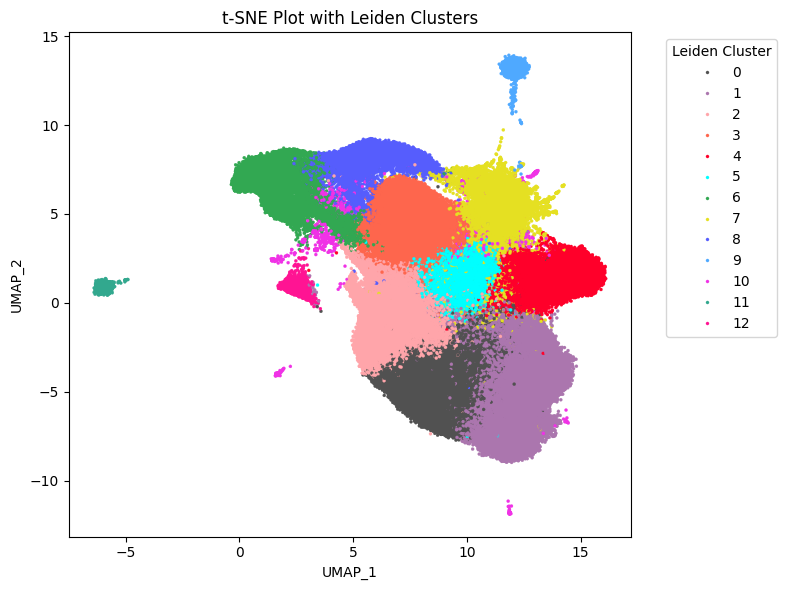

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='UMAP_1', y='UMAP_2', hue='leiden', palette=custom_palette, s=5, edgecolor=None)
plt.title("t-SNE Plot with Leiden Clusters")
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.legend(title="Leiden Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("UMAP_Leiden_Clusters_RES0.4.pdf", format="pdf")
plt.show()

## heatmap

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


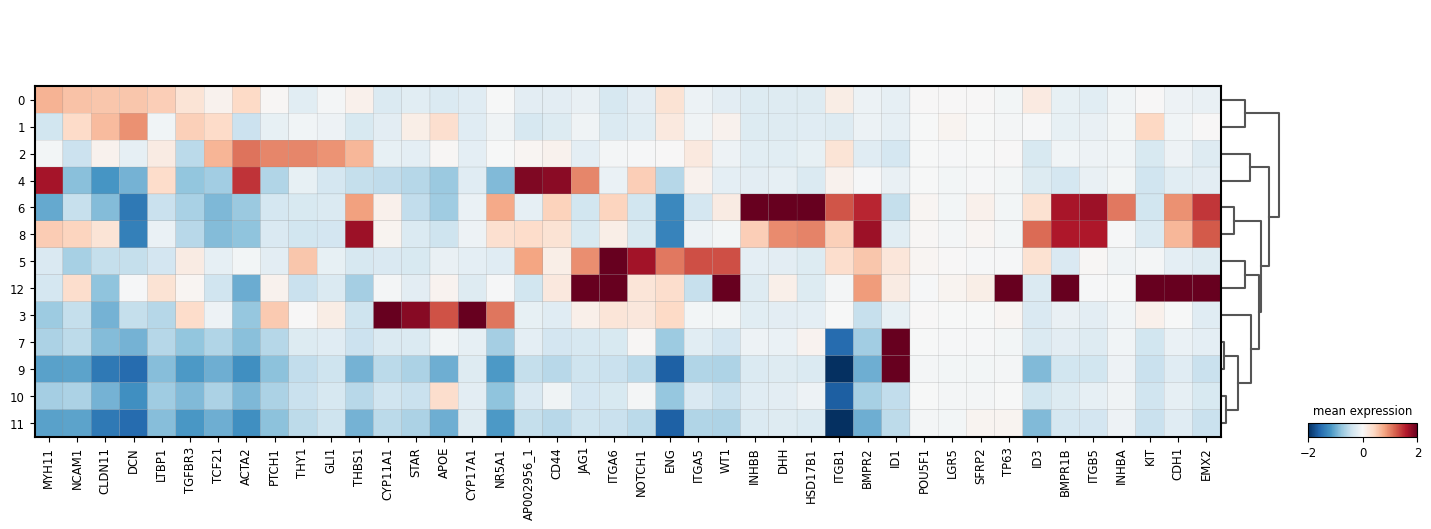

In [86]:
sc.pl.matrixplot(
    adata,
    gene_names,
    "leiden",
    colorbar_title="mean expression",
    dendrogram=True,
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    save='heatmap_all_roi_new_selected_zscore_res0.4.pdf'
)

In [112]:
z_score_data = adata[:, gene_names].to_df(layer="scaled")
#z_score_data = adata[:, gene_names].to_df()
z_score_data['leiden'] = adata.obs['leiden'].values

# 重置索引以便生成用于 R 分析的整洁表格
z_score_data.reset_index(inplace=True)
z_score_data = z_score_data.drop(columns=['index'])

grouped_mean = z_score_data.groupby("leiden").mean()
grouped_mean.to_excel("grouped_mean_df_adata_top5_zscore.xlsx", index=True)

C:\Users\fwei\AppData\Local\Temp\ipykernel_5336\2281220.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mean = z_score_data.groupby("leiden").mean()


## mapping of sample

In [88]:
## The hexcodes for the colors used .
## The celltypes are mapped to the colors for plotting convenience.
celltypes, hex_codes = np.array(
    sorted(
        [
            ["0", "#515151"],   # Gray
            ["1", "#AB76AE"],   # Lavender
            ["2", "#ffa5aa"],   # Pink
            ["3", "#FE664D"],   # Coral Red
            ["4", "#ff002a"],   # Bright Red
            ["5", "#00FFFF"],   # Cyan
            ["6", "#32a852"],   # Green
            ["7", "#e5e022"],   # Yellow
            ["8", "#565DFD"],   # Blue
            ["9", "#4fa9ff"],   # Light Blue
            ["10", "#F032E6"],  # Magenta
            ["11", "#32a88e"],  # Teal
            ["12", "#FF1493"],  # Deep Pink
            ["13", "#FF1493"],  # Deep Pink (重复)
            ["14", "#9f50f9"],  # Purple
            ["15", "#AB76AE"],  # Lavender (重复)
            ["16", "#999999"],  # Light Gray
            ["17", "#515151"],  # Gray (重复)
            ["18", "#FFD700"],  # Gold
            ["19", "#00FFFF"],  # Cyan (重复)
            ["20", "#3694a8"],  # Steel Blue
            ["21", "#FF6347"],  # Tomato
            ["22", "#ffa5aa"],  # Pink (重复)
            ["23", "#32a852"],  # Green (重复)
            ["24", "#a8329e"],  # Violet
            ["25", "#3255a8"],  # Denim Blue
            ["26", "#a88232"],  # Olive
            ["27", "#32a88e"],  # Teal (重复)
            ["28", "#a83250"],  # Maroon
        ],
        key=lambda x: x[0]  # 按第一列（celltypes）排序
    )
).T
## used for converting list of celltypes to categorical.
ctype_to_code_map = {ctype: i for i, ctype in enumerate(celltypes)}
## used for converting list of celltypes to colors.
ctype_hex_map = dict(zip(celltypes, hex_codes))
## matplotlib colormap
ctype_cmap = hexlist_to_cmap("celltype_cmap", hex_codes)

共有 9331 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中
跳过无效或非共有 cell_id: Cell102_4929_63
跳过无效或非共有 cell_id: Cell1035_9386_899
跳过无效或非共有 cell_id: Cell1067_2462_945
跳过无效或非共有 cell_id: Cell1193_7784_1060
跳过无效或非共有 cell_id: Cell1198_7673_1057
跳过无效或非共有 cell_id: Cell1217_6825_1103
跳过无效或非共有 cell_id: Cell1249_7379_1125
跳过无效或非共有 cell_id: Cell1270_7776_1140
跳过无效或非共有 cell_id: Cell1294_8800_1187
跳过无效或非共有 cell_id: Cell1340_2749_1221
跳过无效或非共有 cell_id: Cell1363_10404_1249
跳过无效或非共有 cell_id: Cell1379_6063_1278
跳过无效或非共有 cell_id: Cell1403_2504_1284
跳过无效或非共有 cell_id: Cell1408_7419_1304
跳过无效或非共有 cell_id: Cell1414_7481_1300
跳过无效或非共有 cell_id: Cell1476_9909_1385
跳过无效或非共有 cell_id: Cell1527_6184_1466
跳过无效或非共有 cell_id: Cell161_4309_109
跳过无效或非共有 cell_id: Cell1658_2329_1687
跳过无效或非共有 cell_id: Cell1660_10324_1689
跳过无效或非共有 cell_id: Cell1686_10044_1742
跳过无效或非共有 cell_id: Cell1690_8502_1709
跳过无效或非共有 cell_id: Cell1721_8371_1782
跳过无效或非共有 cell_id: Cell1789_8393_1931
跳过无效或非共有 cell_id: Cell1817_9036_1998
跳过无效或非共有 cell_id: Ce

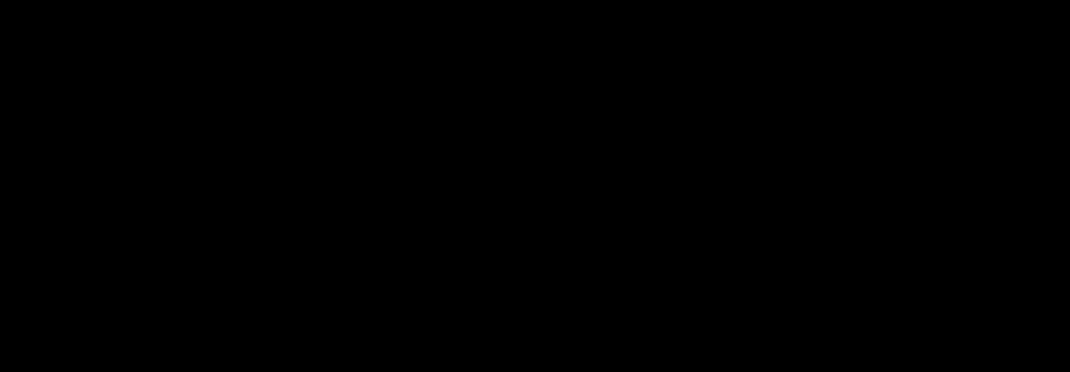

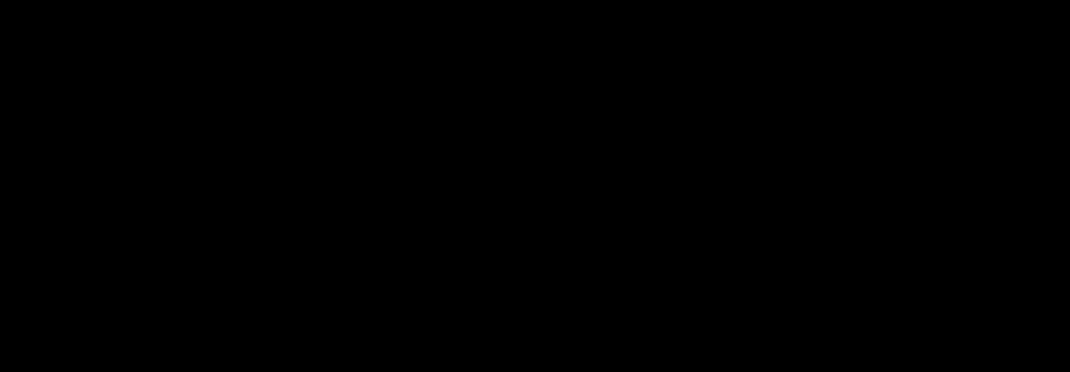

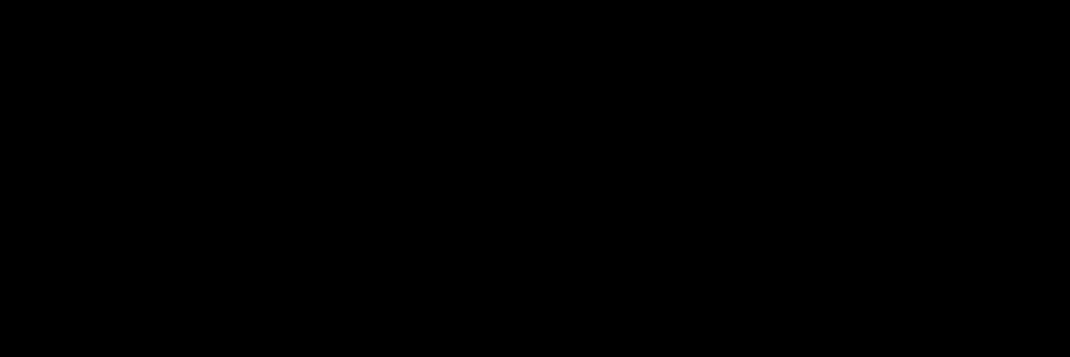

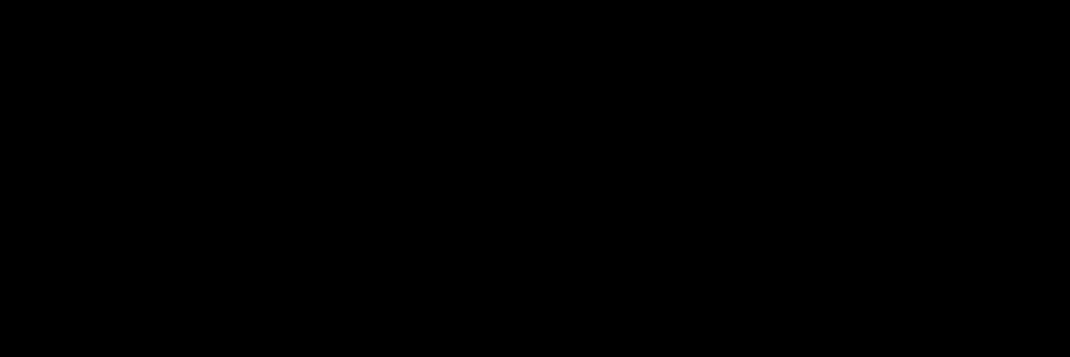

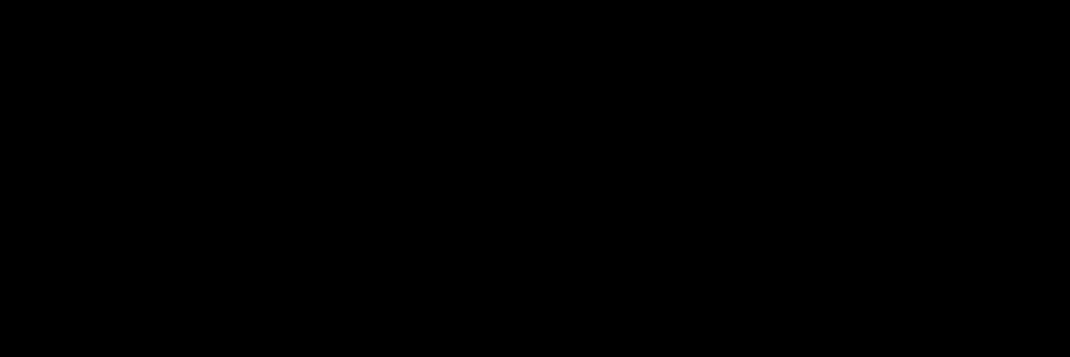

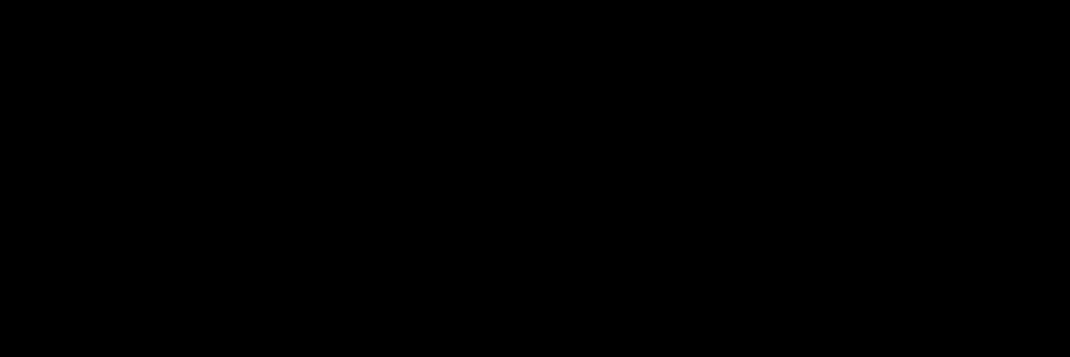

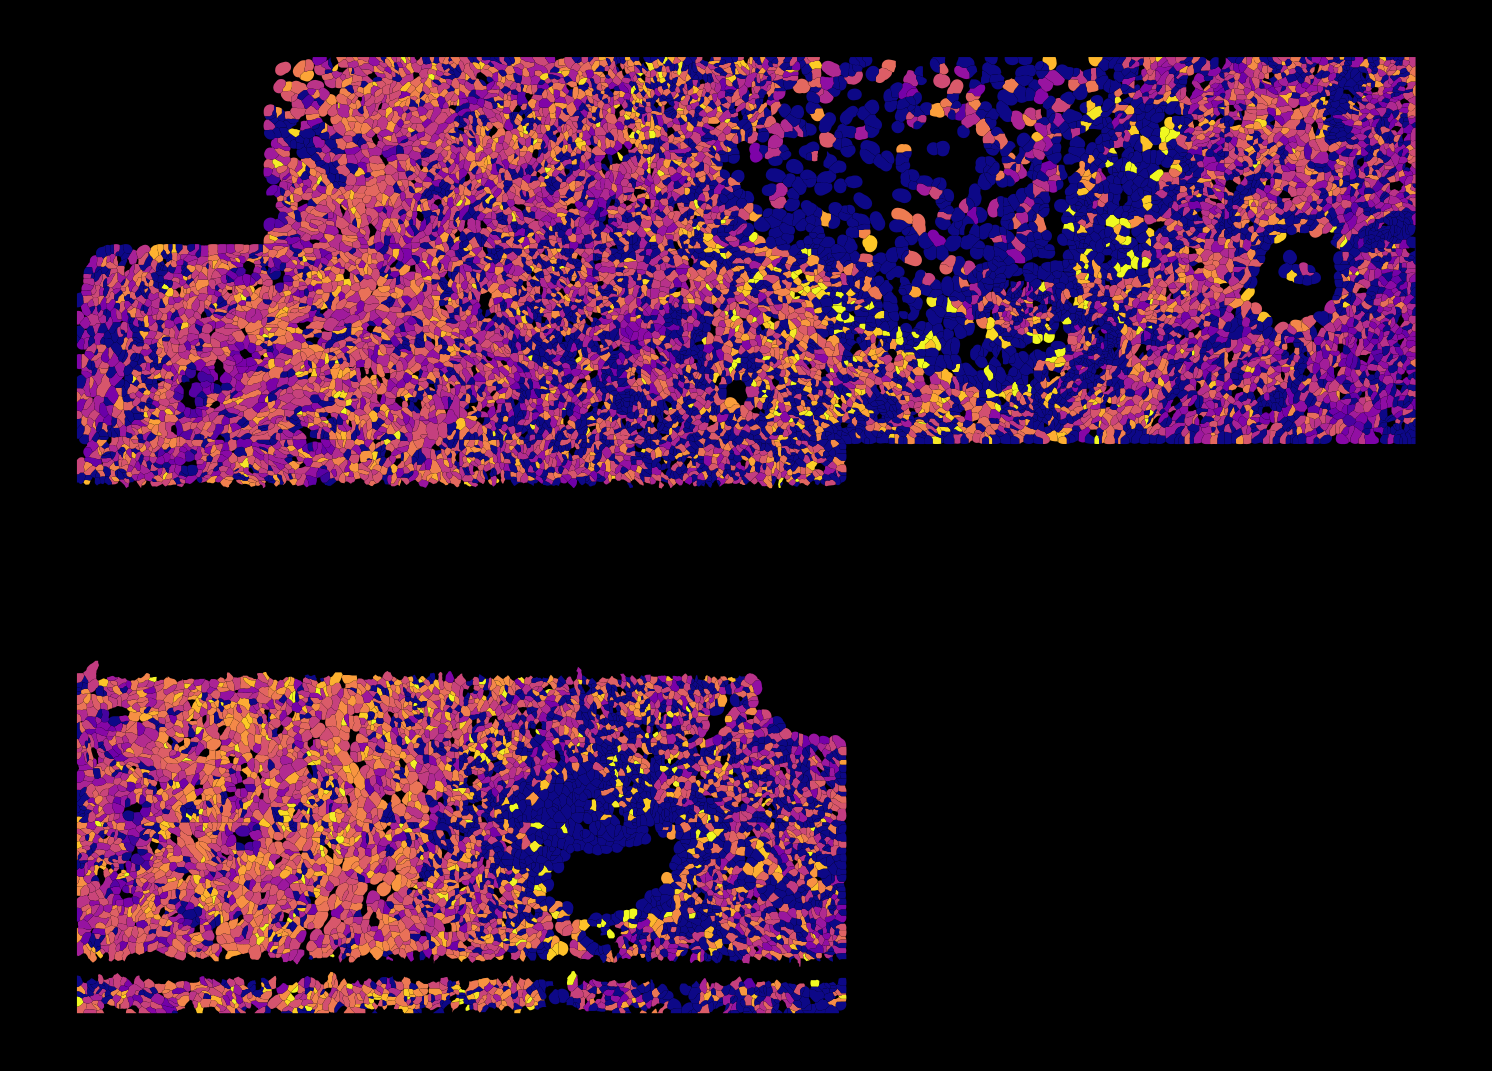

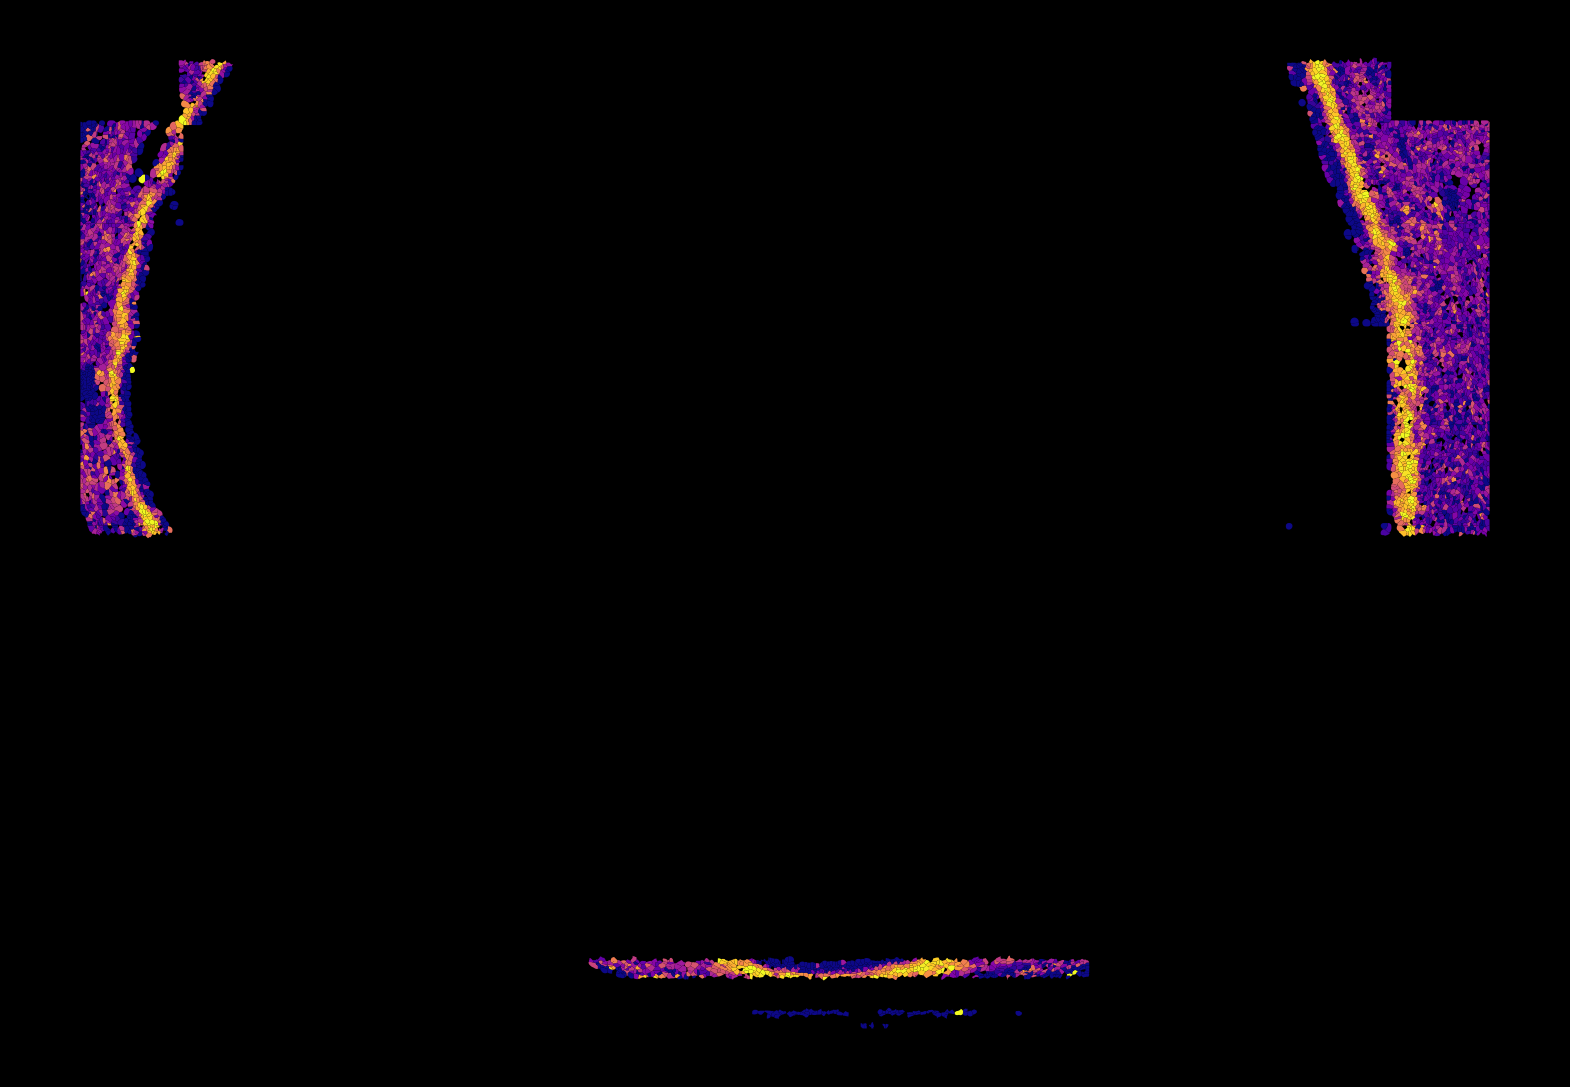

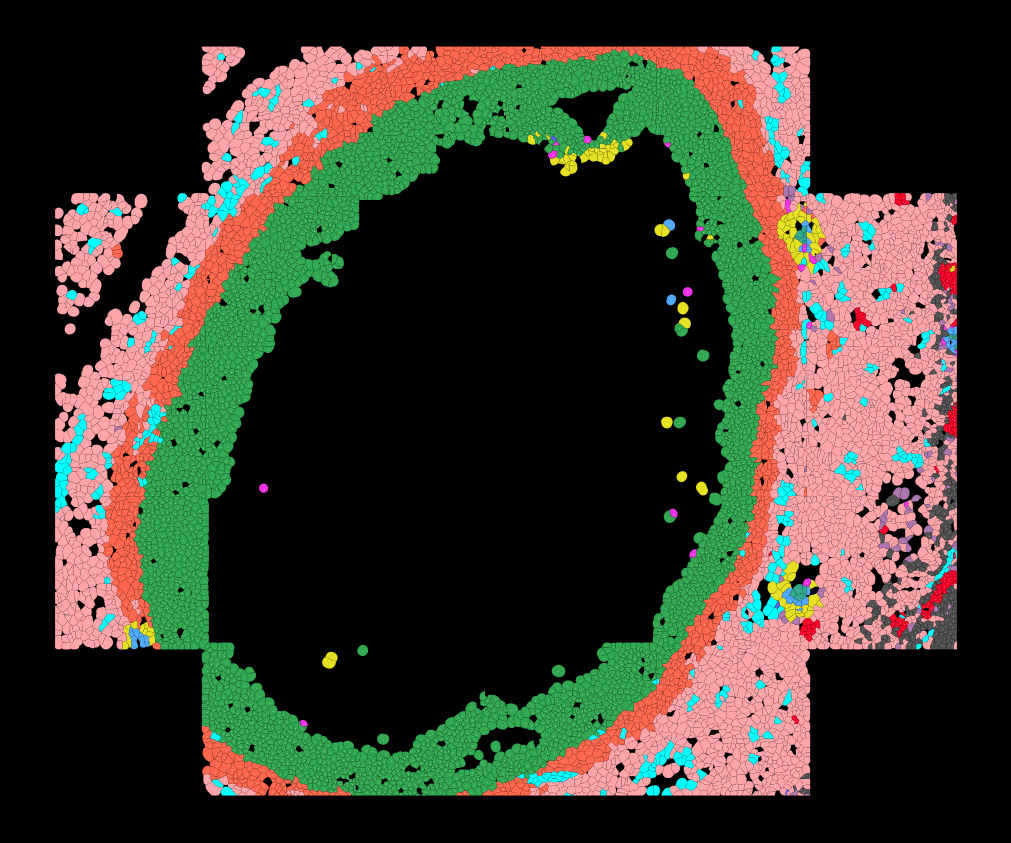

In [111]:
#for single sample

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
# 读取原始数据
df = pd.read_csv("result download from website/segment/33422-2363-adult1_D2-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv", header=None, names=["cell_id", "x", "y"])

# 按 cell_id 分组创建多边形
geometries = []
cell_ids = []

for cell_id, group in df.groupby("cell_id"):
    coords = list(zip(group["x"], group["y"]))
    polygon = Polygon(coords)  # Shapely 自动闭合多边形
    geometries.append(polygon)
    cell_ids.append(cell_id)

# 创建 GeoDataFrame
xenium_cell_polygons = gpd.GeoDataFrame({'cell_id': cell_ids, 'geometry': geometries})


# 确保 cell_id 类型一致（例如统一为字符串）
xenium_cell_ids = set(xenium_cell_polygons["cell_id"].astype(str))
adata_cell_ids = set(adata.obs["cell_id"].astype(str))

# 计算共有 cell_id
common_cell_ids = xenium_cell_ids & adata_cell_ids
print(f"共有 {len(common_cell_ids)} 个 cell_id 同时存在于 xenium_cell_polygons 和 adata.obs 中")


valid_polygons = []
valid_clusters = []

# 遍历 xenium_cell_polygons 中的每个细胞
for idx, row in xenium_cell_polygons.iterrows():
    cell_id = str(row["cell_id"])  # 确保类型一致
    geom = row.geometry
    
    # 仅处理共有 cell_id 且几何有效的多边形
    if (
        cell_id in common_cell_ids
        and geom.is_valid
        and geom.geom_type == 'Polygon'
        and len(geom.exterior.coords) >= 3
    ):
        coords = list(geom.exterior.coords)
        valid_polygons.append(coords)
        # 从 adata.obs 中获取对应的聚类标签（假设 cell_id 是 adata.obs 的索引）
        valid_clusters.append(adata.obs.loc[cell_id, "leiden"])
    else:
        print(f"跳过无效或非共有 cell_id: {cell_id}")


# 检查是否有有效数据
if len(valid_polygons) == 0:
    raise ValueError("没有可绘制的有效多边形！")

# 创建绘图
fig = plt.figure(figsize=(12.8, 10.7))
ax = plt.gca()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 绘制多边形
plot_polygons(
    valid_polygons,
    ax=ax,
    array=list(map(ctype_to_code_map.get, valid_clusters)),
    edgecolor="none",
    linewidth=0,
    norm=Normalize(vmin=0, vmax=len(celltypes)),
    cmap=ctype_cmap,
)

#add text
for polygon_coords, cluster_value in zip(valid_polygons, valid_clusters):
    try:
        # 提取多边形坐标点（格式为 [(x0, y0), (x1, y1), ...]）
        x = [coord[0] for coord in polygon_coords]
        y = [coord[1] for coord in polygon_coords]
        
        # 计算中心点
        center_x = np.mean(x)
        center_y = np.mean(y)
        
        # 获取对应的 newimmune1 标签（假设 valid_clusters 已对应）
        # 如果 newimmune1 是另一个列，需通过 cell_id 匹配
        label = str(cluster_value)  # 或用 adata.obs.loc[cell_id, "newimmune1"]
        
        # 添加文本（调整字体大小和颜色以可见）
        ax.text(
            center_x, center_y, label,
            fontsize=0.01,  # 调整为合适大小（原0.001不可见）
            ha='center', va='center',
            color='white'  # 黑色背景上需用浅色
        )
    except Exception as e:
        print(f"添加标签失败: {str(e)}")

# 设置坐标轴
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('mapping/D2_1_new.png', dpi=900, bbox_inches='tight', pad_inches=0.1)
plt.show()

## maping of gene

In [16]:
from anndata import read_h5ad
adata=read_h5ad("processed_h5ad/C1_1_processed.h5ad")
adata.obs["cell_id"]=adata.obs["full_id"]

In [7]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C1_1_1"  # 输出目录（建议新目录）
ASPECT_RATIO = (10.7,8.6)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (1):
['IHH']

生成: IHH_expression.png


In [18]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse
from matplotlib.cm import ScalarMappable  # 导入 ScalarMappable

# ================== 配置参数 ==================
TARGET_GENES = ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C1_1_1"  # 输出目录（建议新目录）
ASPECT_RATIO = (10.7,8.6)          # 图像比例
DPI = 900                       # 分辨率
CMAP = "plasma"                 # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)

        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))}
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()

            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)
            cmap = plt.get_cmap(CMAP)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid &
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（修改背景颜色为白色）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='white')
            ax.set_facecolor('white')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = cmap(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 添加颜色图例
            sm = ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])  # for older matplotlib versions
            cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04) # 调整图例大小和位置
            cbar.set_label(f"{gene} Expression", color='black') # 设置图例标签颜色
            cbar.ax.tick_params(labelcolor='black') # 设置图例刻度标签颜色

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (1):
['IHH']

生成: IHH_expression.png


In [19]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse
from matplotlib.cm import ScalarMappable  # 导入 ScalarMappable

# ================== 配置参数 ==================
TARGET_GENES = ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C1-1_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C1_1_1"  # 输出目录（建议新目录）
ASPECT_RATIO = (10.7,8.6)          # 图像比例
DPI = 900                       # 分辨率
CMAP = "plasma"                 # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)

        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))}
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()

            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)
            cmap = plt.get_cmap(CMAP)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid &
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（修改背景颜色为白色）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='white')
            ax.set_facecolor('white')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = cmap(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存主图
            output_path_main = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path_main, dpi=DPI, bbox_inches='tight')
            plt.close(fig) # 关闭主图

            # 创建新的 Figure 和 Axes 用于保存图例
            fig_legend = plt.figure(figsize=(1, 6)) # 设置图例的尺寸
            ax_legend = fig_legend.add_axes([0.1, 0.1, 0.2, 0.8]) # [左, 下, 宽, 高] 调整图例位置和大小

            # 添加颜色图例到新的 Axes
            sm = ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])  # for older matplotlib versions
            cbar = plt.colorbar(sm, cax=ax_legend)
            cbar.set_label(f"{gene} Expression", color='black')
            cbar.ax.tick_params(labelcolor='black')

            # 保存图例为 PDF
            output_path_legend = os.path.join(OUTPUT_DIR, f"{gene}_legend.pdf")
            plt.savefig(output_path_legend, bbox_inches='tight', format='pdf')
            plt.close(fig_legend) # 关闭图例的 Figure

            print(f"生成: {os.path.basename(output_path_main)}")
            print(f"生成图例: {os.path.basename(output_path_legend)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None
        plt.close() if 'fig_legend' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (1):
['IHH']

生成: IHH_expression.png
生成图例: IHH_legend.pdf


In [9]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_A1-4_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "A1_4"  # 输出目录（建议新目录）
ASPECT_RATIO = (12.8,4.3)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (1):
['IHH']

生成: IHH_expression.png


In [11]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES =  ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_C2-2_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "C2_2"  # 输出目录（建议新目录）
ASPECT_RATIO = (20,20)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (0):
[]

即将绘制的基因 (1):
['IHH']

生成: IHH_expression.png


In [15]:
import os
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
from scipy.sparse import issparse

# ================== 配置参数 ==================
TARGET_GENES = ["IHH"]
SAMPLE_CSV_PATH = "result download from website/segment/33422-2363-adult1_A1-3_DAPI__7.5_mu_dilated_segmentation_cell_polygons.csv"
OUTPUT_DIR = "A1_3"  # 输出目录（建议新目录）
ASPECT_RATIO = (9,9)          # 图像比例
DPI = 900                        # 分辨率
CMAP = "plasma"                  # 颜色方案

# ================== 检查基因存在性 ==================
missing_genes = [gene for gene in TARGET_GENES if gene not in adata.var_names]
existing_genes = [gene for gene in TARGET_GENES if gene in adata.var_names]

print(f"未找到的基因 ({len(missing_genes)}):\n{missing_genes}\n")
print(f"即将绘制的基因 ({len(existing_genes)}):\n{existing_genes}\n")

# ================== 主函数（修改版）==================
def plot_genes_with_global_norm(adata, csv_path, genes):
    """绘制多基因表达图（全局颜色标准化）"""
    try:
        # 1. 读取空间数据并生成多边形（与原代码相同）
        df = pd.read_csv(csv_path, header=None, names=["cell_id", "x", "y"])
        df["cell_id"] = df["cell_id"].astype(str)
        
        spatial_gdf = gpd.GeoDataFrame(
            [{'cell_id': cid, 'geometry': Polygon(zip(grp.x, grp.y))} 
             for cid, grp in df.groupby("cell_id")]
        ).set_index('cell_id')

        # 2. 提取样本对应的adata子集（与原代码相同）
        sample_cells = spatial_gdf.index.intersection(adata.obs['cell_id'].astype(str))
        adata_sample = adata[adata.obs['cell_id'].astype(str).isin(sample_cells)].copy()

        # 3. 遍历每个基因绘图（关键修改部分）
        for gene in genes:
            # 全局计算颜色范围（跨所有样本）
            if issparse(adata.X):
                global_expr = adata[:, gene].X.toarray().flatten()
            else:
                global_expr = adata[:, gene].X.flatten()
            
            # 计算全局vmax
            global_vmax = max(np.quantile(global_expr, 0.99), 1e-5)
            norm = Normalize(vmin=0, vmax=global_vmax)

            # 提取当前样本的表达数据（与原代码相同）
            if issparse(adata_sample.X):
                expr = pd.Series(
                    adata_sample[:, gene].X.toarray().flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )
            else:
                expr = pd.Series(
                    adata_sample[:, gene].X.flatten(),
                    index=adata_sample.obs['cell_id'].astype(str)
                )

            # 合并空间与表达数据（与原代码相同）
            merged_gdf = spatial_gdf.join(expr.rename('expression'), how='inner')
            valid_gdf = merged_gdf[
                merged_gdf.geometry.is_valid & 
                (merged_gdf.geometry.type == 'Polygon') &
                (merged_gdf.geometry.apply(lambda g: len(g.exterior.coords) >= 3))
            ]

            # 创建画布（与原代码相同）
            fig, ax = plt.subplots(figsize=ASPECT_RATIO, facecolor='black')
            ax.set_facecolor('black')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_aspect("equal")

            # 绘制多边形（使用全局norm）
            for cid, row in valid_gdf.iterrows():
                poly = row['geometry']
                color = plt.get_cmap(CMAP)(norm(row['expression']))  # 关键点：使用全局norm
                ax.fill(*poly.exterior.xy, color=color, linewidth=0)

            # 保存图像
            output_path = os.path.join(OUTPUT_DIR, f"{gene}_expression.png")
            plt.savefig(output_path, dpi=DPI, bbox_inches='tight')
            plt.close()
            print(f"生成: {os.path.basename(output_path)}")

    except Exception as e:
        print(f"严重错误: {str(e)}")
        plt.close() if 'plt' in locals() else None

# ================== 执行代码 ==================
if __name__ == "__main__":
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    plot_genes_with_global_norm(adata, SAMPLE_CSV_PATH, existing_genes)

未找到的基因 (1):
['IHH']

即将绘制的基因 (0):
[]



In [ ]:
combined_data_all_roi_new_selected_processed_res1.h5ad"

# 7 external figure

In [7]:
from anndata import read_h5ad
combined_adata=read_h5ad("combined_data_all_roi_new_processed.h5ad")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
combined_adata.obs

full_id cell_type cell_number coordinate_x  \
Cell1_2180_16              Cell1_2180_16      Cell           1         2180   
Cell2_2297_13              Cell2_2297_13      Cell           2         2297   
Cell3_2340_2                Cell3_2340_2      Cell           3         2340   
Cell4_2433_8                Cell4_2433_8      Cell           4         2433   
Cell5_2543_3                Cell5_2543_3      Cell           5         2543   
...                                  ...       ...         ...          ...   
Cell9330_7186_10693  Cell9330_7186_10693      Cell        9330         7186   
Cell9331_9416_10684  Cell9331_9416_10684      Cell        9331         9416   
Cell9332_2161_10668  Cell9332_2161_10668      Cell        9332         2161   
Cell9333_2532_10686  Cell9333_2532_10686      Cell        9333         2532   
Cell9334_9532_10685  Cell9334_9532_10685      Cell        9334         9532   

                    expression sample_id sample leiden              cell_id  
Cell1_2180_16               16      A1_3   A1_3      1        Cell1_2180_16  
Cell2_2297_13               13      A1_3   A1_3      1        Cell2_2297_13  
Cell3_2340_2                 2      A1_3   A1_3      1         Cell3_2340_2  
Cell4_2433_8                 8      A1_3   A1_3      1         Cell4_2433_8  
Cell5_2543_3                 3      A1_3   A1_3      1         Cell5_2543_3  
...                        ...       ...    ...    ...                  ...  
Cell9330_7186_10693      10693      D2_1   D2_1      3  Cell9330_7186_10693  
Cell9331_9416_10684      10684      D2_1   D2_1      2  Cell9331_9416_10684  
Cell9332_2161_10668      10668      D2_1   D2_1      2  Cell9332_2161_10668  
Cell9333_2532_10686      10686      D2_1   D2_1      2  Cell9333_2532_10686  
Cell9334_9532_10685      10685      D2_1   D2_1      2  Cell9334_9532_10685  

[251421 rows x 9 columns]

In [9]:
combined_adata.obs["leiden"].value_counts()

leiden
0     64719
1     61383
2     28910
3     23115
4     15913
5     15196
6     14719
7     11576
8      8413
9      2728
10     2632
11     1303
12      814
Name: count, dtype: int64

In [10]:
combined_adata.obs["sample"].value_counts()

sample
D1_1    34889
A2_2    26306
B2_1    24795
D1_2    24244
C2_2    23723
B2_4    21572
A2_3    16332
D1_3    14816
A2_1    12798
A1_3    11208
C1_1     9444
D2_1     9331
A1_4     9043
B2_3     6323
A2_4     3832
C2_1     2765
Name: count, dtype: int64

In [13]:
#sc.tl.rank_genes_groups(combined_adata, "leiden", method="wilcoxon")
rank_genes_df = sc.get.rank_genes_groups_df(combined_adata, group=None)
rank_genes_df

group   names      scores  logfoldchanges          pvals      pvals_adj
0        0   MYH11  213.796295        2.025504   0.000000e+00   0.000000e+00
1        0   NCAM1  174.460861        1.451739   0.000000e+00   0.000000e+00
2        0  CLDN11  160.236740        1.349487   0.000000e+00   0.000000e+00
3        0     DCN  153.185547        1.480142   0.000000e+00   0.000000e+00
4        0   LTBP1  135.543106        1.269664   0.000000e+00   0.000000e+00
...    ...     ...         ...             ...            ...            ...
1022    12     FN1  -15.946617       -0.571678   3.007513e-57   9.503742e-57
1023    12   SNAI2  -15.966904       -2.050939   2.173094e-57   7.153100e-57
1024    12   THBS1  -17.928894       -2.334852   7.016194e-72   2.639425e-71
1025    12  CLDN11  -22.512823       -1.832659  3.108349e-112  1.292419e-111
1026    12   ACTA2  -28.647055       -3.331237  1.744400e-180  1.252796e-179

[1027 rows x 6 columns]

In [16]:
sc.tl.rank_genes_groups(combined_adata, "leiden", method="wilcoxon",pts=True)

D:\anaconda\envs\xenium-publication-env\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [17]:
rank_genes_df = sc.get.rank_genes_groups_df(combined_adata, group=None)
rank_genes_df

group   names      scores  logfoldchanges          pvals      pvals_adj  \
0        0   MYH11  213.796295        2.025504   0.000000e+00   0.000000e+00   
1        0   NCAM1  174.460861        1.451739   0.000000e+00   0.000000e+00   
2        0  CLDN11  160.236740        1.349487   0.000000e+00   0.000000e+00   
3        0     DCN  153.185547        1.480142   0.000000e+00   0.000000e+00   
4        0   LTBP1  135.543106        1.269664   0.000000e+00   0.000000e+00   
...    ...     ...         ...             ...            ...            ...   
1022    12     FN1  -15.946617       -0.571678   3.007513e-57   9.503742e-57   
1023    12   SNAI2  -15.966904       -2.050939   2.173094e-57   7.153100e-57   
1024    12   THBS1  -17.928894       -2.334852   7.016194e-72   2.639425e-71   
1025    12  CLDN11  -22.512823       -1.832659  3.108349e-112  1.292419e-111   
1026    12   ACTA2  -28.647055       -3.331237  1.744400e-180  1.252796e-179   

      pct_nz_group  pct_nz_reference  
0         0.946152          0.577975  
1         0.870486          0.565741  
2         0.949597          0.703410  
3         0.990559          0.728043  
4         0.706470          0.447360  
...            ...               ...  
1022      0.936118          0.874728  
1023      0.227273          0.493901  
1024      0.405405          0.586711  
1025      0.657248          0.767137  
1026      0.340295          0.740630  

[1027 rows x 8 columns]

In [18]:
filtered_genes_df = rank_genes_df[
    (rank_genes_df['pvals_adj'] < 0.05) & # 条件1：pvals_adj 小于 0.05
    (rank_genes_df['pct_nz_group'] > 0.6)   # 条件2：pct_nz_group 大于 0.6
]

In [19]:
filtered_genes_df

group   names      scores  logfoldchanges          pvals      pvals_adj  \
0        0   MYH11  213.796295        2.025504   0.000000e+00   0.000000e+00   
1        0   NCAM1  174.460861        1.451739   0.000000e+00   0.000000e+00   
2        0  CLDN11  160.236740        1.349487   0.000000e+00   0.000000e+00   
3        0     DCN  153.185547        1.480142   0.000000e+00   0.000000e+00   
4        0   LTBP1  135.543106        1.269664   0.000000e+00   0.000000e+00   
...    ...     ...         ...             ...            ...            ...   
981     12    APOE    5.199439        0.177195   1.998912e-07   3.036808e-07   
1011    12   ITGB1   -5.542020       -0.062847   2.990015e-08   4.820637e-08   
1015    12   MYH11   -8.350861       -0.897330   6.776710e-17   1.372718e-16   
1022    12     FN1  -15.946617       -0.571678   3.007513e-57   9.503742e-57   
1025    12  CLDN11  -22.512823       -1.832659  3.108349e-112  1.292419e-111   

      pct_nz_group  pct_nz_reference  
0         0.946152          0.577975  
1         0.870486          0.565741  
2         0.949597          0.703410  
3         0.990559          0.728043  
4         0.706470          0.447360  
...            ...               ...  
981       0.841523          0.609592  
1011      0.990172          0.901192  
1015      0.760442          0.672463  
1022      0.936118          0.874728  
1025      0.657248          0.767137  

[162 rows x 8 columns]

In [22]:
rank_genes_df.to_excel("DEG_resolve.xlsx", index=False)

In [23]:
filtered_genes_df.to_excel("DEG_resolve_filter.xlsx", index=False)

In [24]:
sample_to_donor_map = {
    'A1_3': 'FTM120',
    'A1_4': 'FTM120',
    'A2_1': 'FTM32',
    'A2_2': 'FTM32',
    'A2_3': 'FTM32',
    'A2_4': 'FTM32',
    'B2_1': 'FTM37',
    'B2_3': 'FTM37',
    'B2_4': 'FTM37',
    'C1_1': 'FTM31',
    'C2_1': 'FTM36',
    'C2_2': 'FTM36',
    'D1_1': 'FTM31',
    'D1_2': 'FTM31',
    'D1_3': 'FTM31',
    'D2_1': 'FTM44'
    # 确保这个字典包含了 combined_adata.obs['sample'] 中所有可能的值
    # 如果有 sample 值不在这个映射中，它们对应的 Donors 值将是 NaN
}


In [25]:
 combined_adata.obs['Donors'] = combined_adata.obs['sample'].map(sample_to_donor_map)

In [26]:
if combined_adata.obs['Donors'].isnull().any():
        print("\n注意: 'Donors' 列中存在 NaN 值，意味着某些 'sample' 值没有对应的 Donors 映射。")
        print("未映射的 'sample' 值 (如果存在):")
        unmapped_samples = combined_adata.obs.loc[combined_adata.obs['Donors'].isnull(), 'sample'].unique()
        print(unmapped_samples)

In [27]:
combined_adata.obs["Donors"].value_counts()

Donors
FTM31     83393
FTM32     59268
FTM37     52690
FTM36     26488
FTM120    20251
FTM44      9331
Name: count, dtype: int64

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


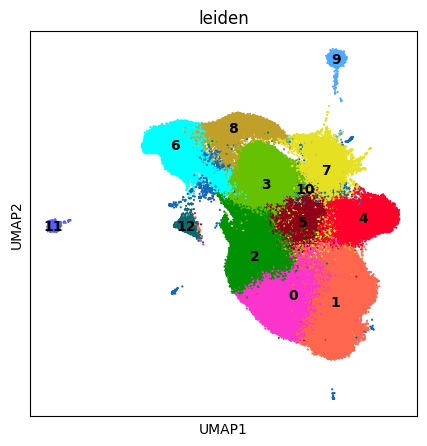

In [30]:
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(combined_adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


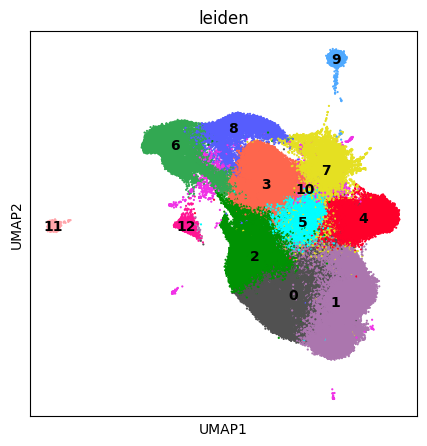

In [32]:
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(combined_adata,color=[ "leiden",], size=10,palette=custom_palette,legend_loc="on data")

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


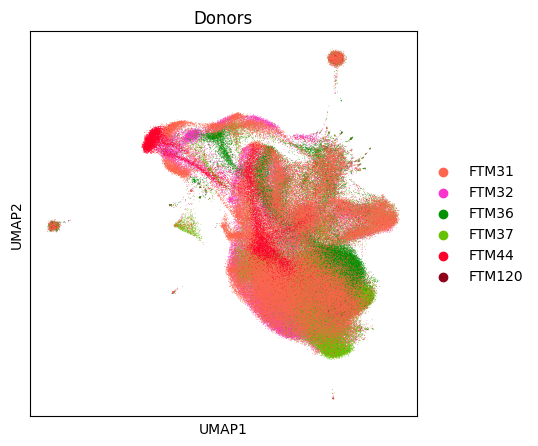

In [47]:
with rc_context({'figure.figsize': (5, 5)}):
     sc.pl.umap(combined_adata,color=[ "Donors",], size=1,palette=custom_palette)

In [46]:
custom_palette = {
    "FTM32": "#fb34cd",
    "FTM31": "#FE664D",
    "FTM36": "#009203",
    "FTM37": "#66c102",
    "FTM44": "#ff002a",
    "FTM120": "#8e0119",
    "6": "#00FFFF",
    "7": "#e5e022",
    "8": "#C1A029",
    "9": "#4fa9ff",
    "10": "#1068be",
    "11": "#565DFD",
    "12": "#10686f",
    "13": "#FF1493",
    "14": "#9f50f9",
    "15": "#AB76AE",
    "16": "#999999",
    "17": "#515151",
    "18": "#FFD700",
    "19": "#00FFFF",
    "20": "#3694a8",
    "21": "#FF6347",
    "22": "#ffa5aa",
    "23": "#32a852",
    "24": "#a8329e",
    "25": "#3255a8",
    "26": "#a88232",
    "27": "#32a88e",
    "28": "#a83250",
}

In [49]:
with plt.rc_context({'figure.figsize': (5, 5)}): # 使用 plt.rc_context 更明确地设置
    sc.pl.umap(combined_adata, color=["Donors",], size=1, show=False,palette=custom_palette) # 重要：设置 show=False

    # 保存为 PNG 文件
    output_png_file = "umap_by_donors.png"
    plt.savefig(output_png_file, dpi=2400, bbox_inches='tight') # dpi 控制分辨率，bbox_inches='tight' 移除白边
    print(f"UMAP 图已保存为 '{output_png_file}'")

    plt.close() # 关闭当前图形，避免在环境中显示

D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\anaconda\envs\xenium-publication-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


UMAP 图已保存为 'umap_by_donors.png'


In [53]:
meta_data_resolve=combined_adata.obs

In [55]:
meta_data_resolve.to_excel("meta_data_resolve.xlsx", index=True)